# Temperature Forecast Project using ML

# Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Attribute Information:

# For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

# Dataset Link

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Temperature%20Forecast/temperature.csv

# Import the needed libraries for data preprocessing, model building and evaluation for regression models

In [10]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,PowerTransformer,OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from scipy.stats import zscore,boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import re

# Read the input dataset and display the first 5 records from the dataset using head() method

In [13]:
temperaturedf=pd.read_csv(r'C:\Users\KIRUTHIKA\OneDrive\Documents\PG Program in Data Science Machine Learning and Neural Network\Internship\Datasets\temperature.csv')
temperaturedf.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

# Get the information about the dataset using info() method

In [16]:
temperaturedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


The info method shows that there are null records present in the dataset.

# Check for the null values present in the dataset using isnull() method in pandas

In [12]:
temperaturedf.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

# Get the shape of the dataset using shape method

In [17]:
temperaturedf.shape

(7752, 25)

In [21]:
temperaturedf['Date']=pd.to_datetime(temperaturedf['Date'])

In [23]:
temperaturedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-null   float64       
 4   LDAPS_RHmin       7677 non-null   float64       
 5   LDAPS_RHmax       7677 non-null   float64       
 6   LDAPS_Tmax_lapse  7677 non-null   float64       
 7   LDAPS_Tmin_lapse  7677 non-null   float64       
 8   LDAPS_WS          7677 non-null   float64       
 9   LDAPS_LH          7677 non-null   float64       
 10  LDAPS_CC1         7677 non-null   float64       
 11  LDAPS_CC2         7677 non-null   float64       
 12  LDAPS_CC3         7677 non-null   float64       
 13  LDAPS_CC4         7677 non-null   float64       
 14  LDAPS_PPT1        7677 n

In [25]:
temperature_df=temperaturedf.drop(columns='Date',axis=1)

# Apply Scikit Learn SimpleImputer to impute the columns contains null records with the mean values

In [29]:
si=SimpleImputer()
temperatures=si.fit_transform(temperature_df)

In [31]:
temperatures_df=pd.DataFrame(temperatures,columns=temperature_df.columns)
temperatures_df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

   LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 24 columns]

In [33]:
temperatures_df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

# Get the statistical summary of the data using describe() method

In [36]:
temperatures_df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.210637      2.956557      2.403036    14.596973     7.157124   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.313244    89.699505   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.932898          2.333973     2.173245    33.567001   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.532764   
50%           29.662273         23.735942     6.563068    57.310630   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.261185  ...     1.754258     1.156174     1.200364     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.148321  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.320110  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.571696  ...     0.024276     0.009697     0.000693    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7752.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.122557   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7752.000000  
mean     22.932220  
std       2.483276  
min      11.300000  
25%      21.400000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

The observation from the statistical summary data are:

1, There are less amount of skewness present in the dataset.

2, The count values for all the columns are same shows that there are no null records in the dataset.

3, The value of 75th percentile is less than the maximum value shows that there are outliers present in the dataset.

# Heatmap to show the correlation between the features in the dataset

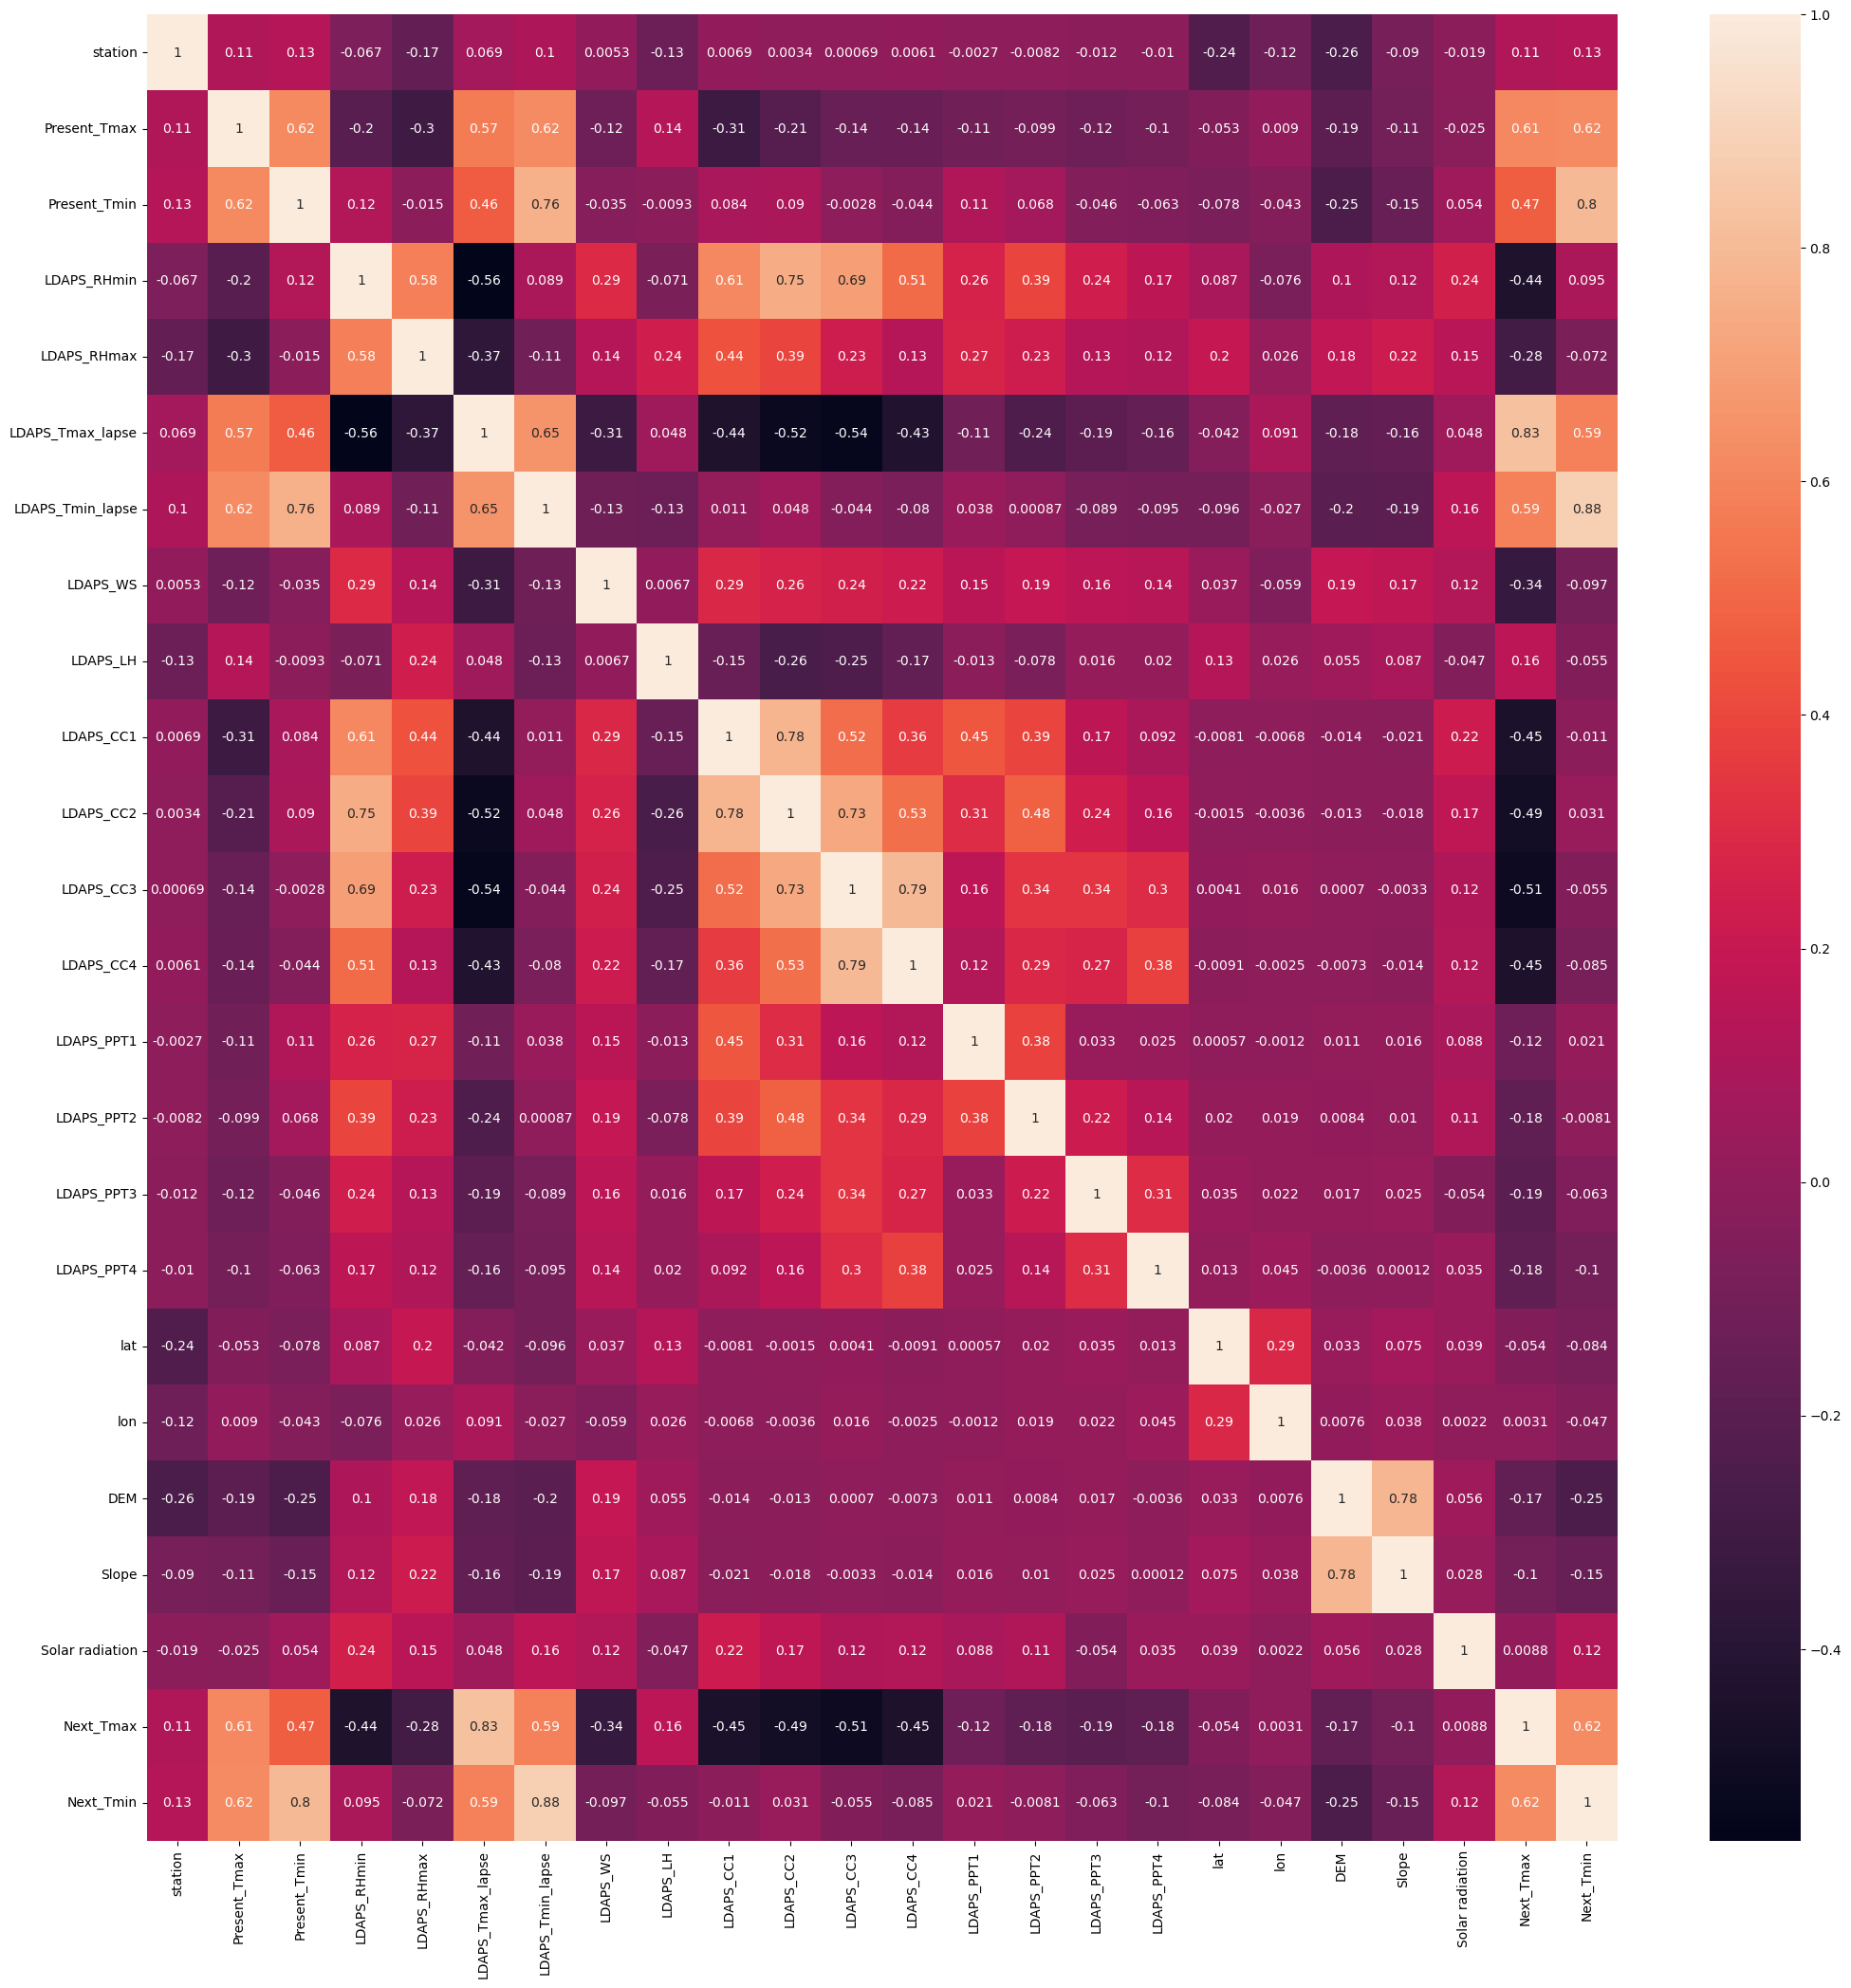

In [33]:
plt.figure(figsize=(25,25))
sns.heatmap(temperatures_df.corr(),annot=True)
plt.show()

The Heatmap shows that the columns Next_Tmax and Next_Tmin are positively correlated with each other. The columns DEM and Slope are positively correlated with each other. The columns LDAPs_Tmax_Lapse and LDAPS_Tmin_Lapse are positively correlated with each other.

# SCatter plot to show the relationship between Present_Tmax and Next_Tmax columns

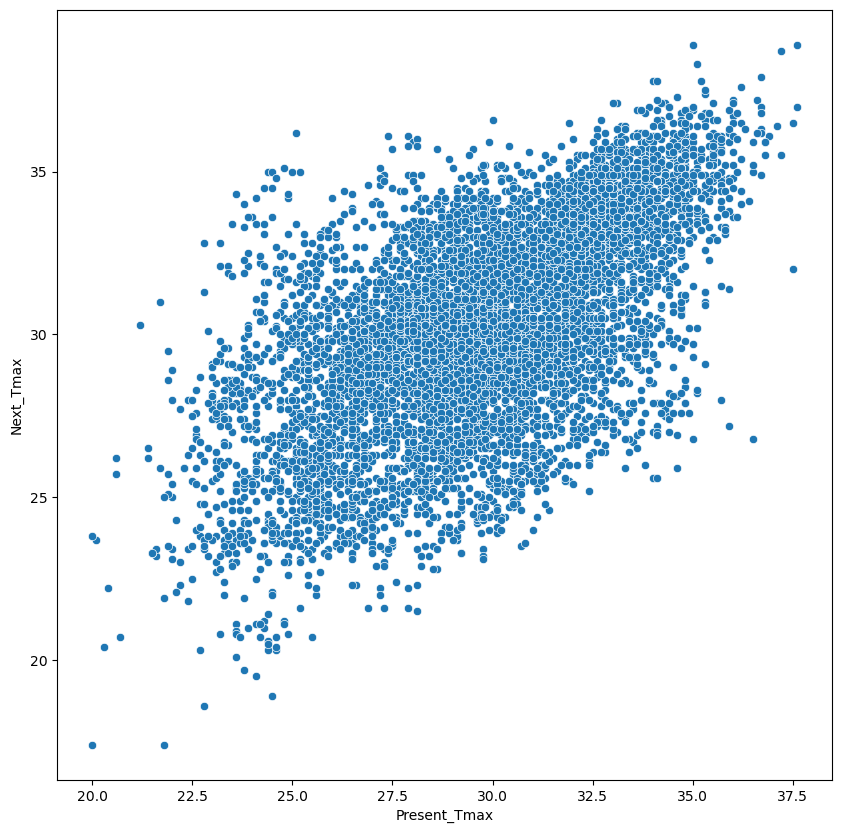

In [34]:
plt.figure(figsize=(10,10))
sns.scatterplot(temperatures_df,x='Present_Tmax',y='Next_Tmax')
plt.show()

# Scatter plot to show the relationship between Present_Tmin and Next_Tmin columns

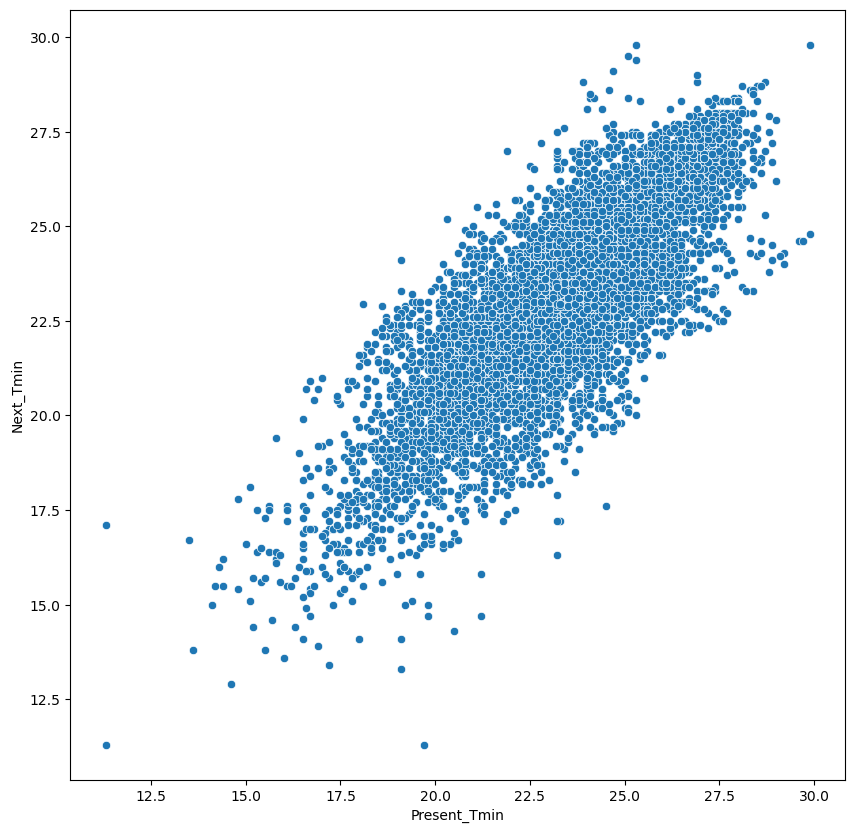

In [43]:
plt.figure(figsize=(10,10))
sns.scatterplot(temperatures_df,x='Present_Tmin',y='Next_Tmin')
plt.show()

# Barplot to show the relationship between weather station number and Next day maximum air temperature

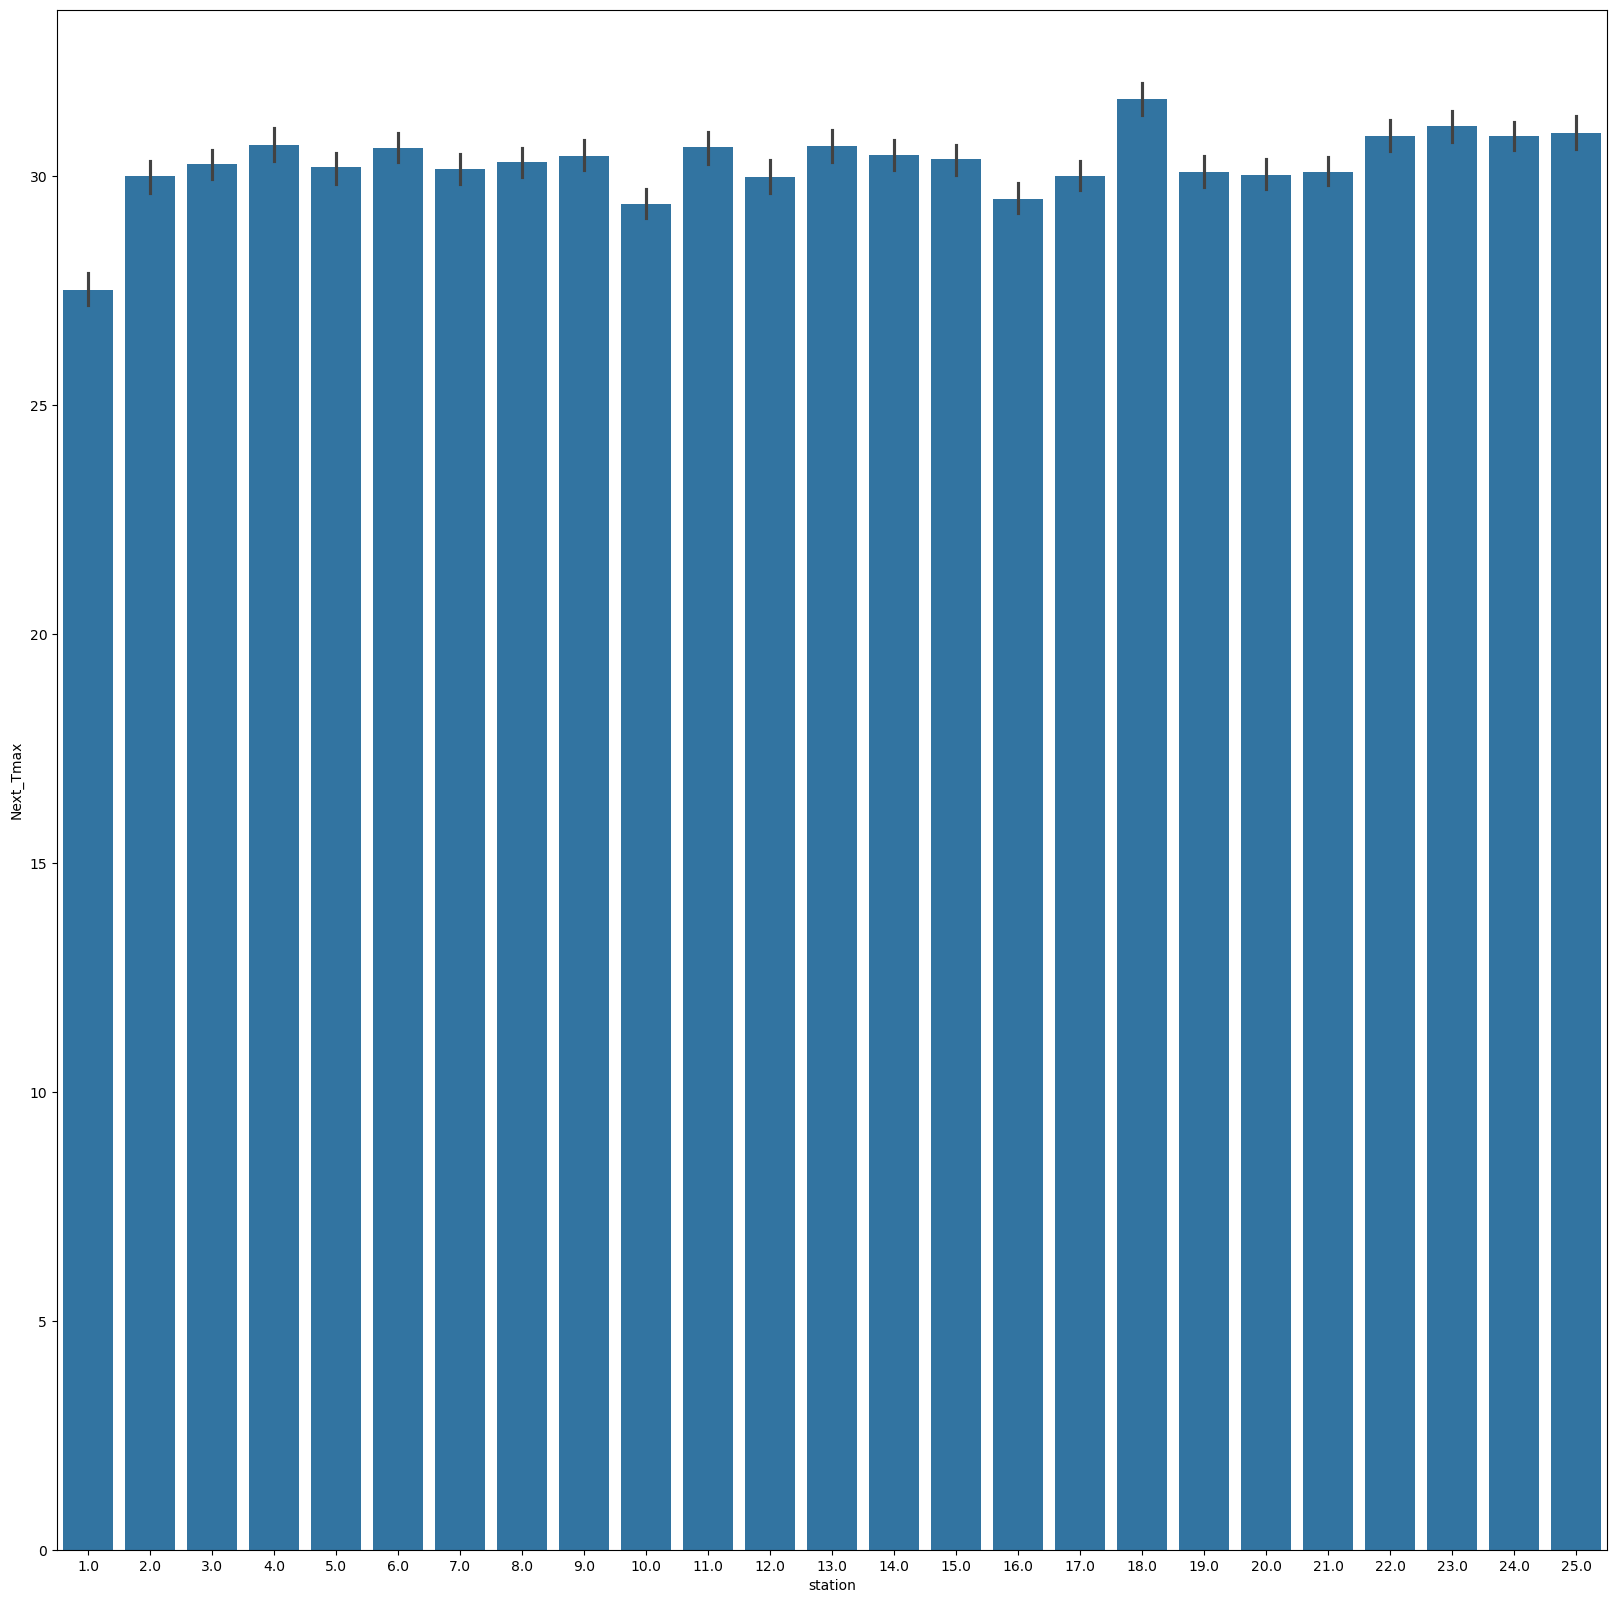

In [47]:
plt.figure(figsize=(20,20))
sns.barplot(temperatures_df,x='station',y='Next_Tmax')
plt.show()

# Barplot to show the relationship between weather station number and Next day minimum air temperature

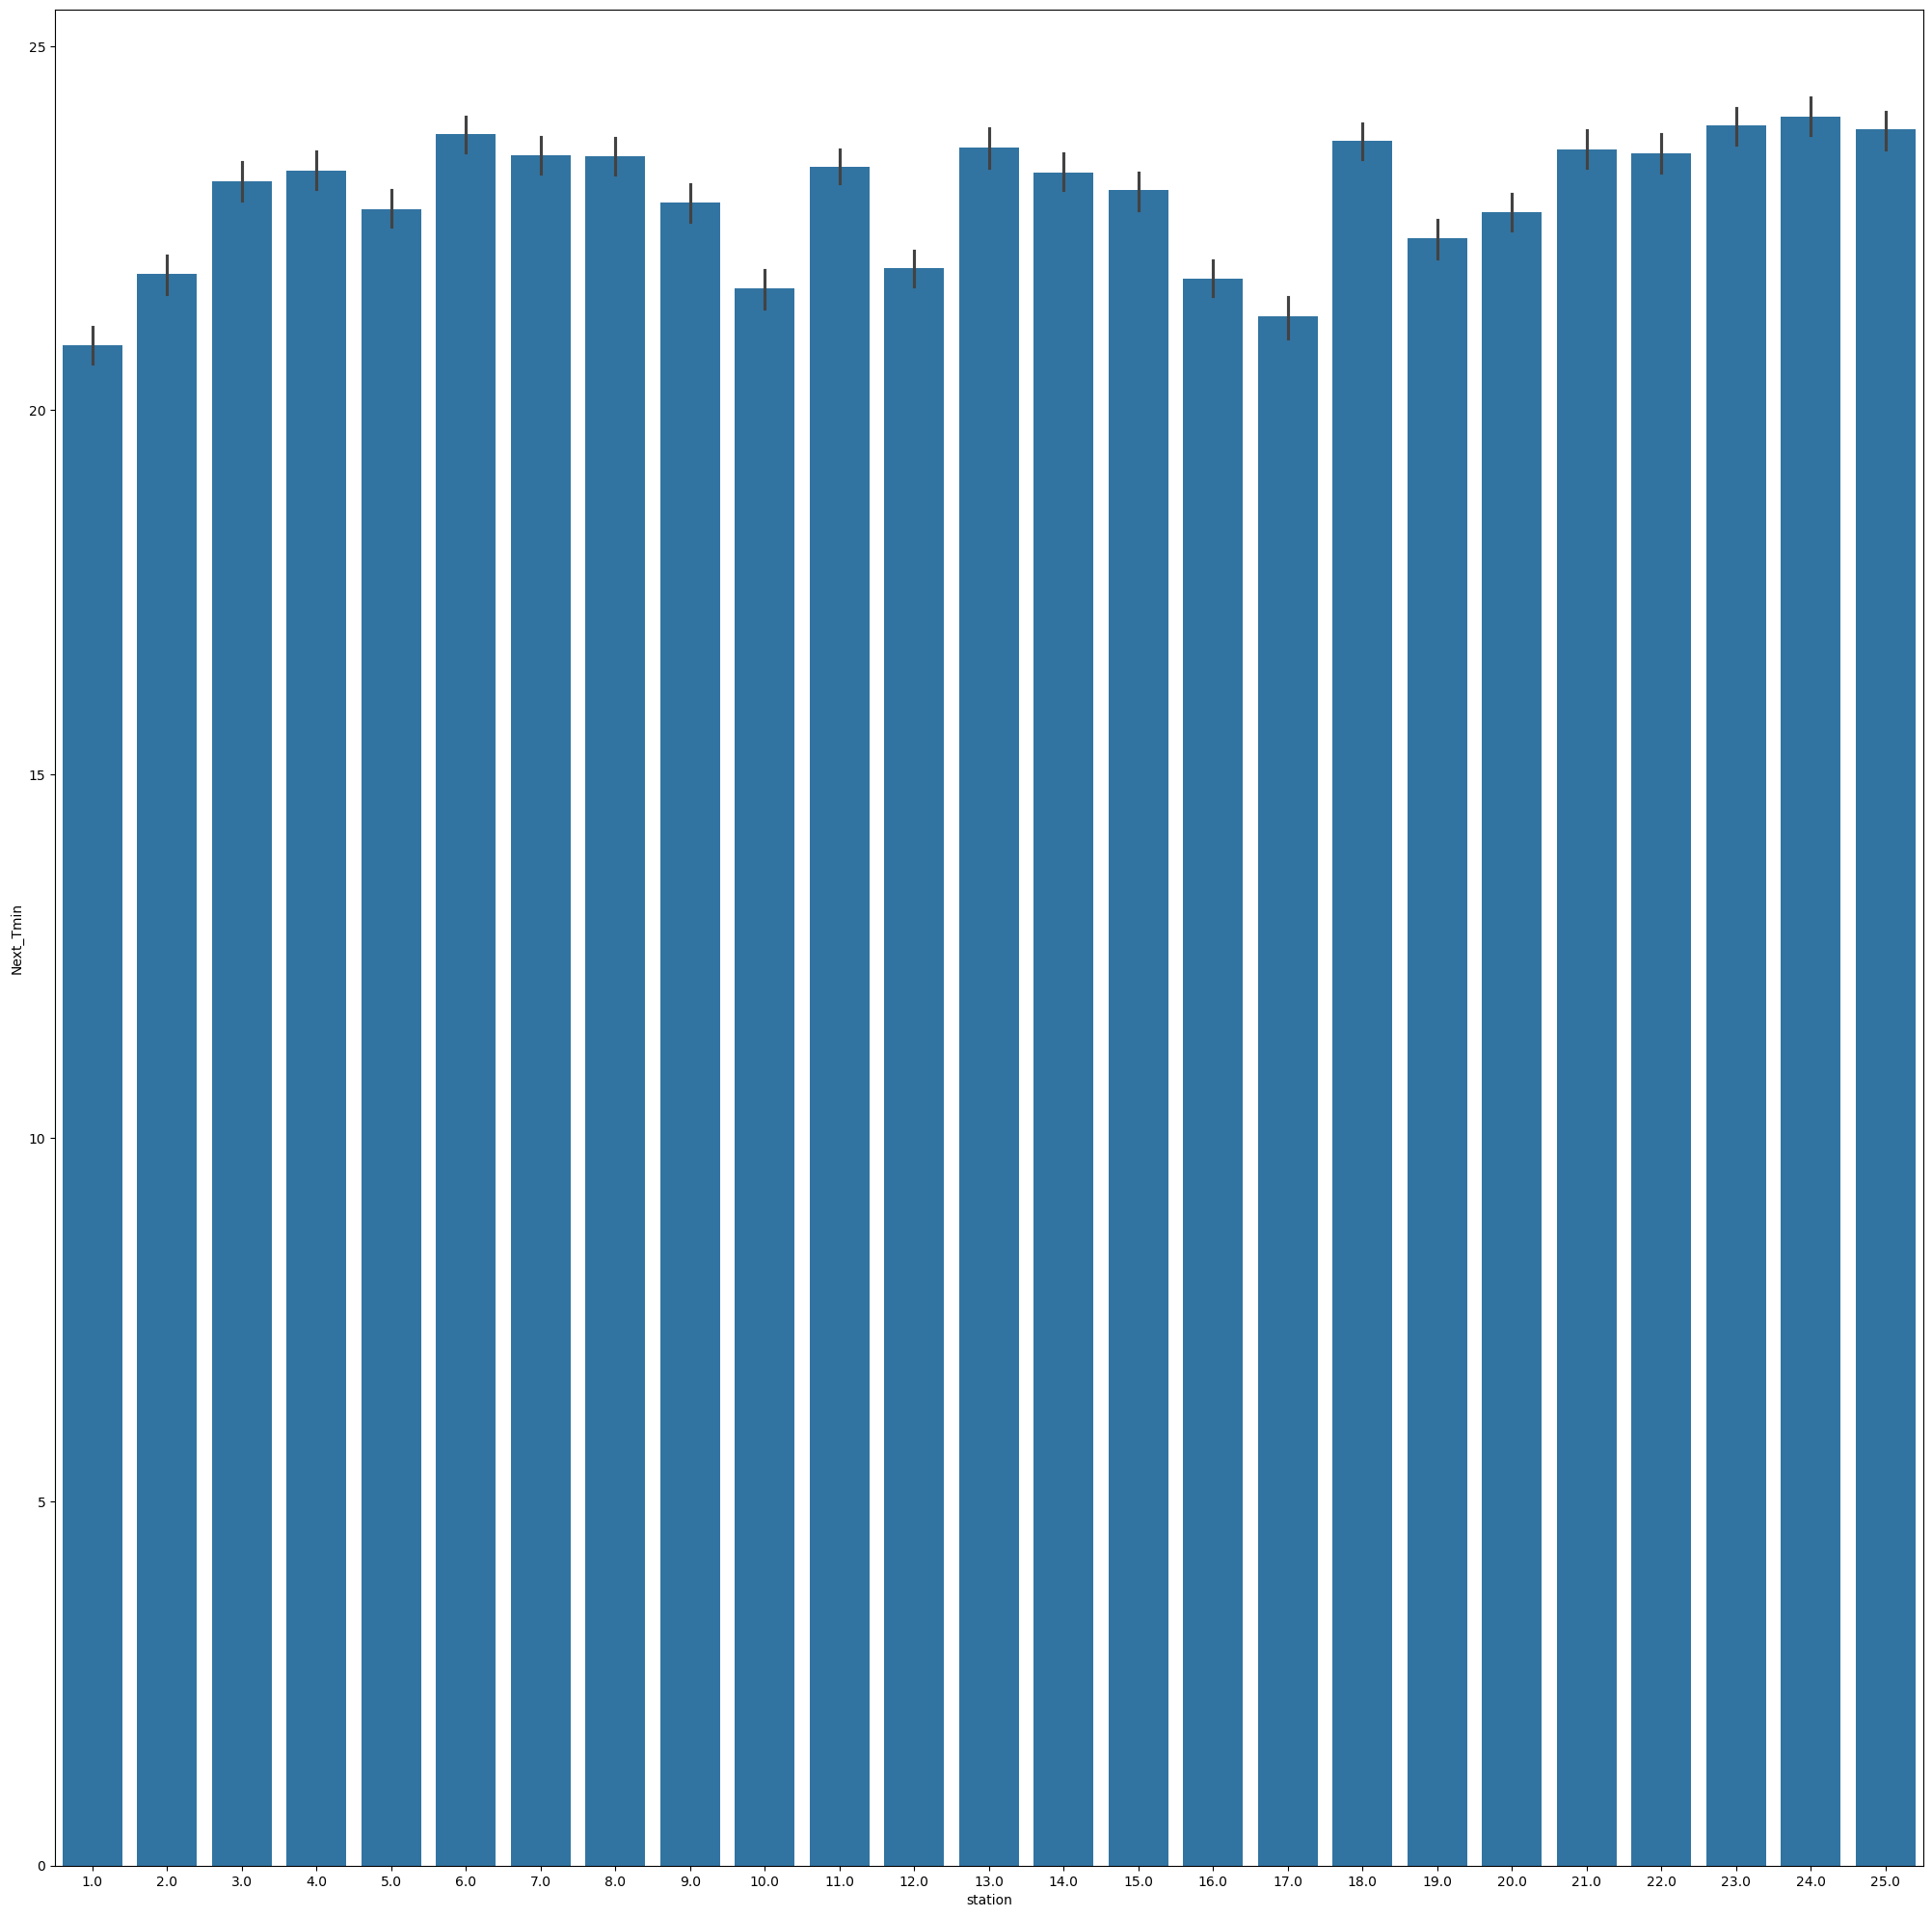

In [52]:
plt.figure(figsize=(25,25))
sns.barplot(temperatures_df,x='station',y='Next_Tmin')
plt.show()

# Scatter plot to show the relationship between LDAPS Tmax lapse and Next day maximum temperature

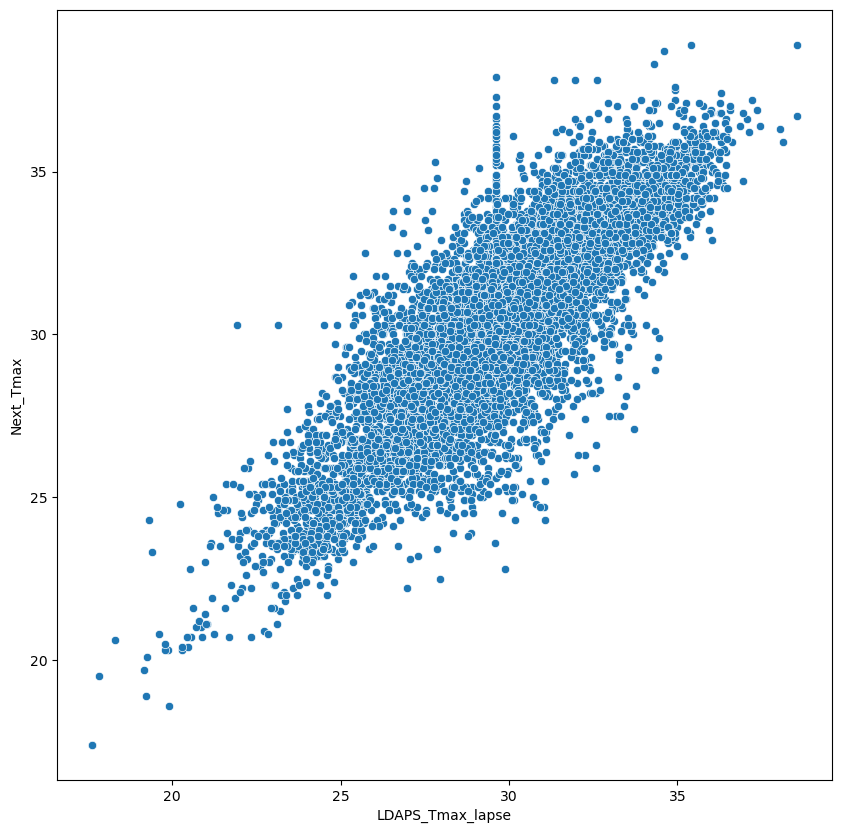

In [43]:
plt.figure(figsize=(10,10))
sns.scatterplot(temperatures_df,x='LDAPS_Tmax_lapse',y='Next_Tmax')
plt.show()

# Scatter plot to show the relationship between LDAPS Tmin lapse and Next day minimum temperature

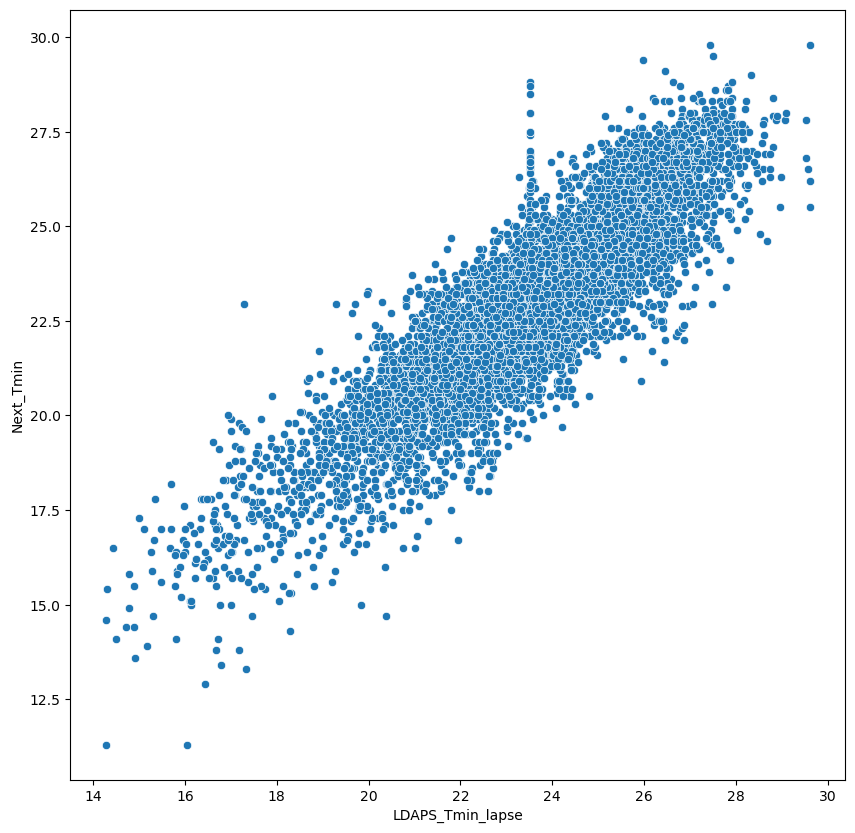

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(temperatures_df,x='LDAPS_Tmin_lapse',y='Next_Tmin')
plt.show()

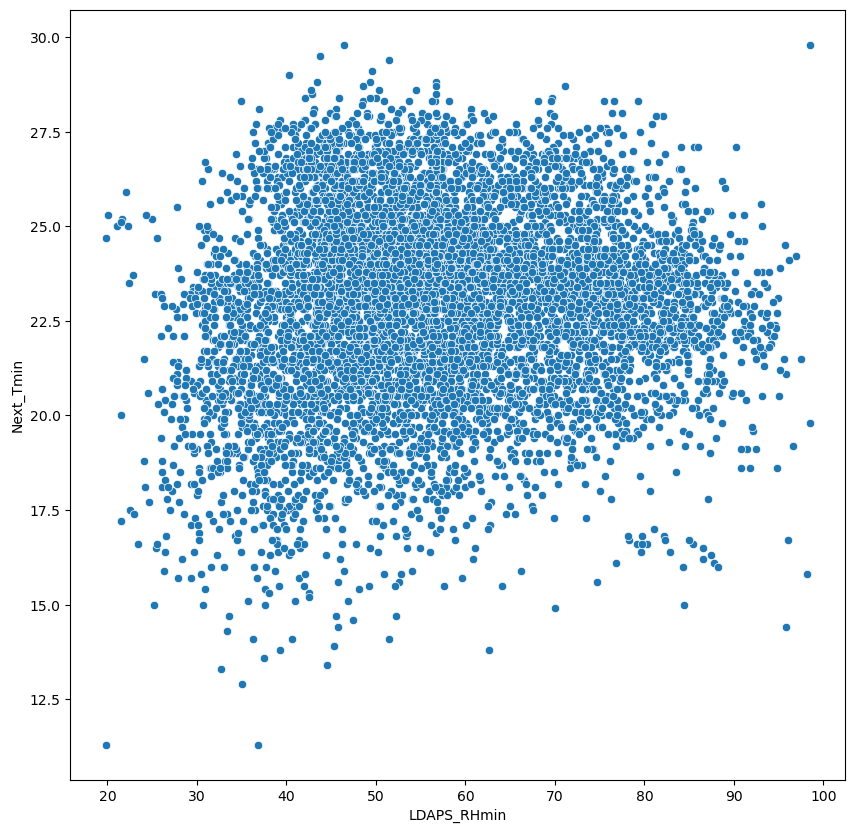

In [47]:
plt.figure(figsize=(10,10))
sns.scatterplot(temperatures_df,x='LDAPS_RHmin',y='Next_Tmin')
plt.show()

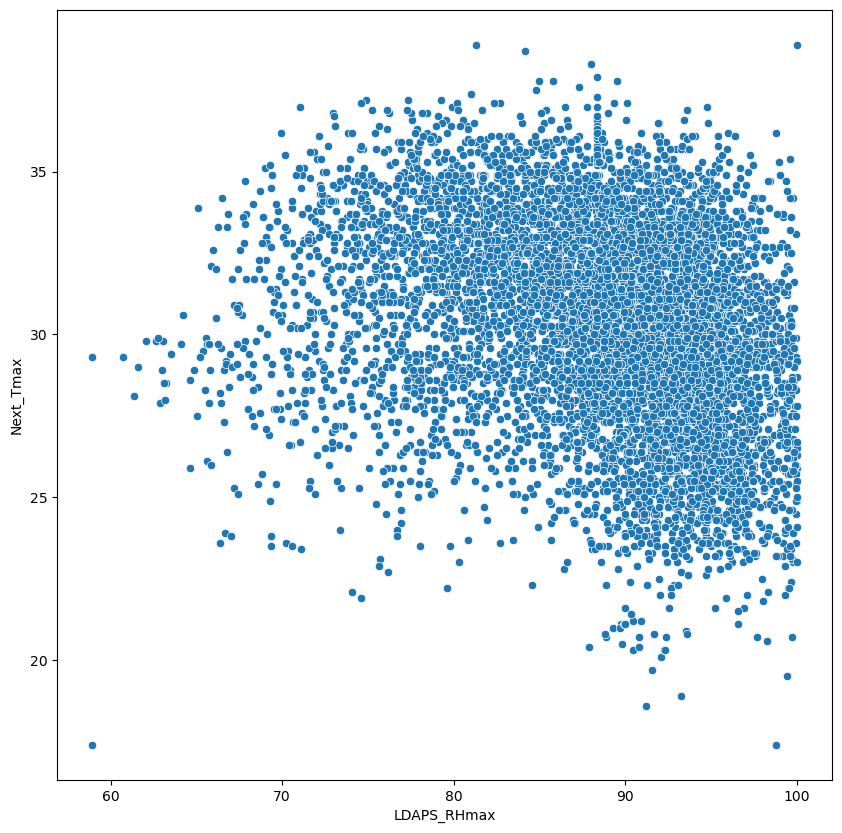

In [49]:
plt.figure(figsize=(10,10))
sns.scatterplot(temperatures_df,x='LDAPS_RHmax',y='Next_Tmax')
plt.show()

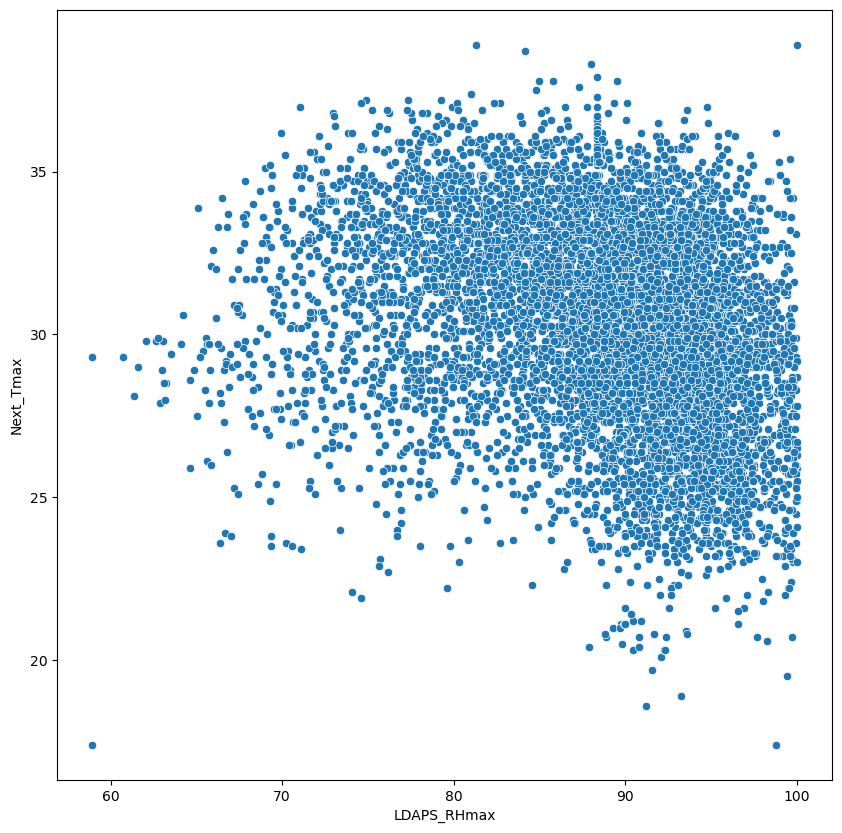

In [51]:
plt.figure(figsize=(10,10))
sns.scatterplot(temperatures_df,x='LDAPS_RHmax',y='Next_Tmax')
plt.show()

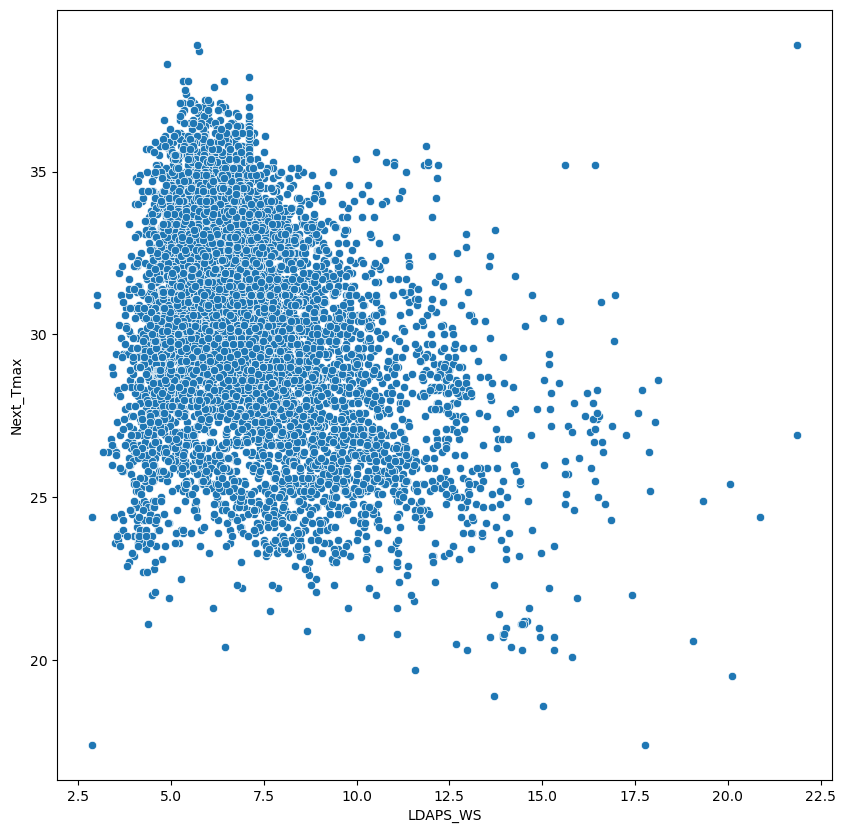

In [52]:
plt.figure(figsize=(10,10))
sns.scatterplot(temperatures_df,x='LDAPS_WS',y='Next_Tmax')
plt.show()

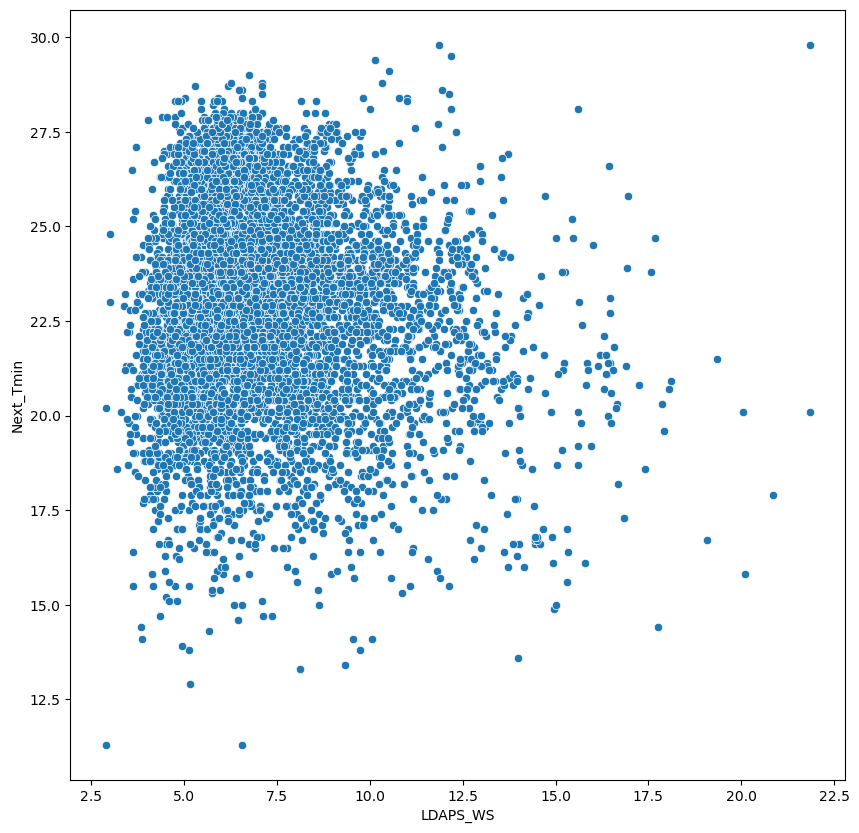

In [55]:
plt.figure(figsize=(10,10))
sns.scatterplot(temperatures_df,x='LDAPS_WS',y='Next_Tmin')
plt.show()

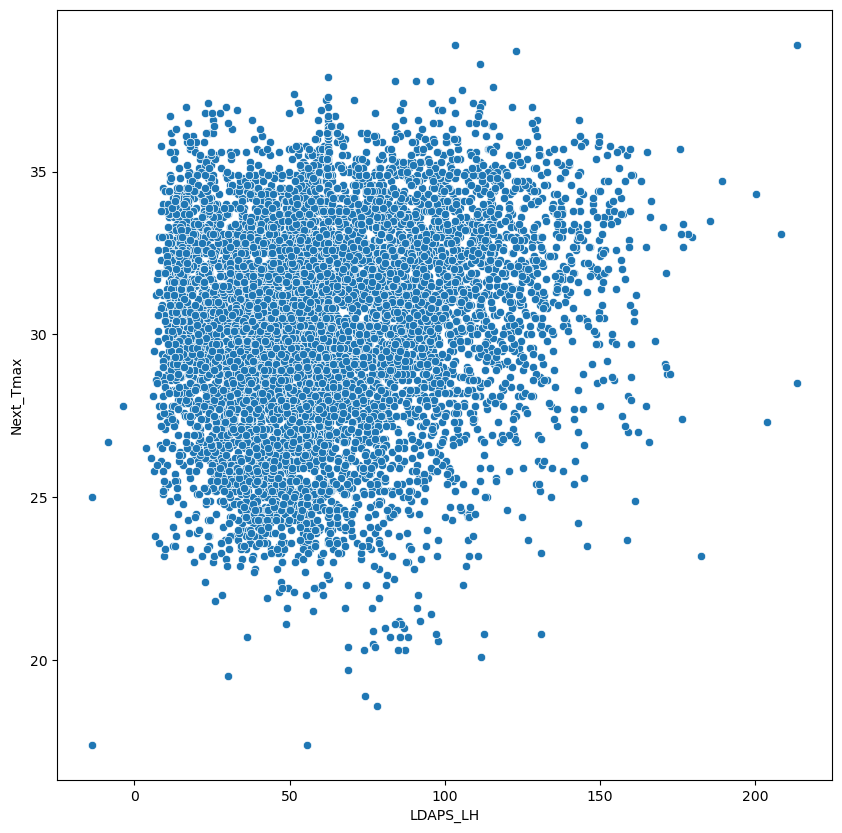

In [56]:
plt.figure(figsize=(10,10))
sns.scatterplot(temperatures_df,x='LDAPS_LH',y='Next_Tmax')
plt.show()

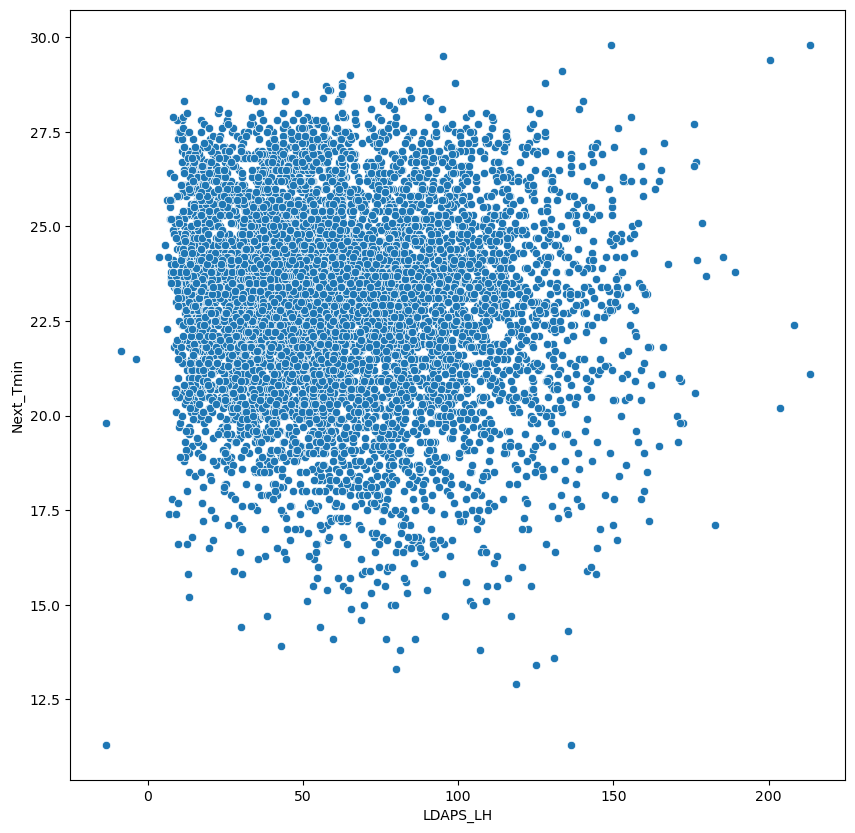

In [59]:
plt.figure(figsize=(10,10))
sns.scatterplot(temperatures_df,x='LDAPS_LH',y='Next_Tmin')
plt.show()

In [61]:
temperatures_df.shape

(7752, 24)

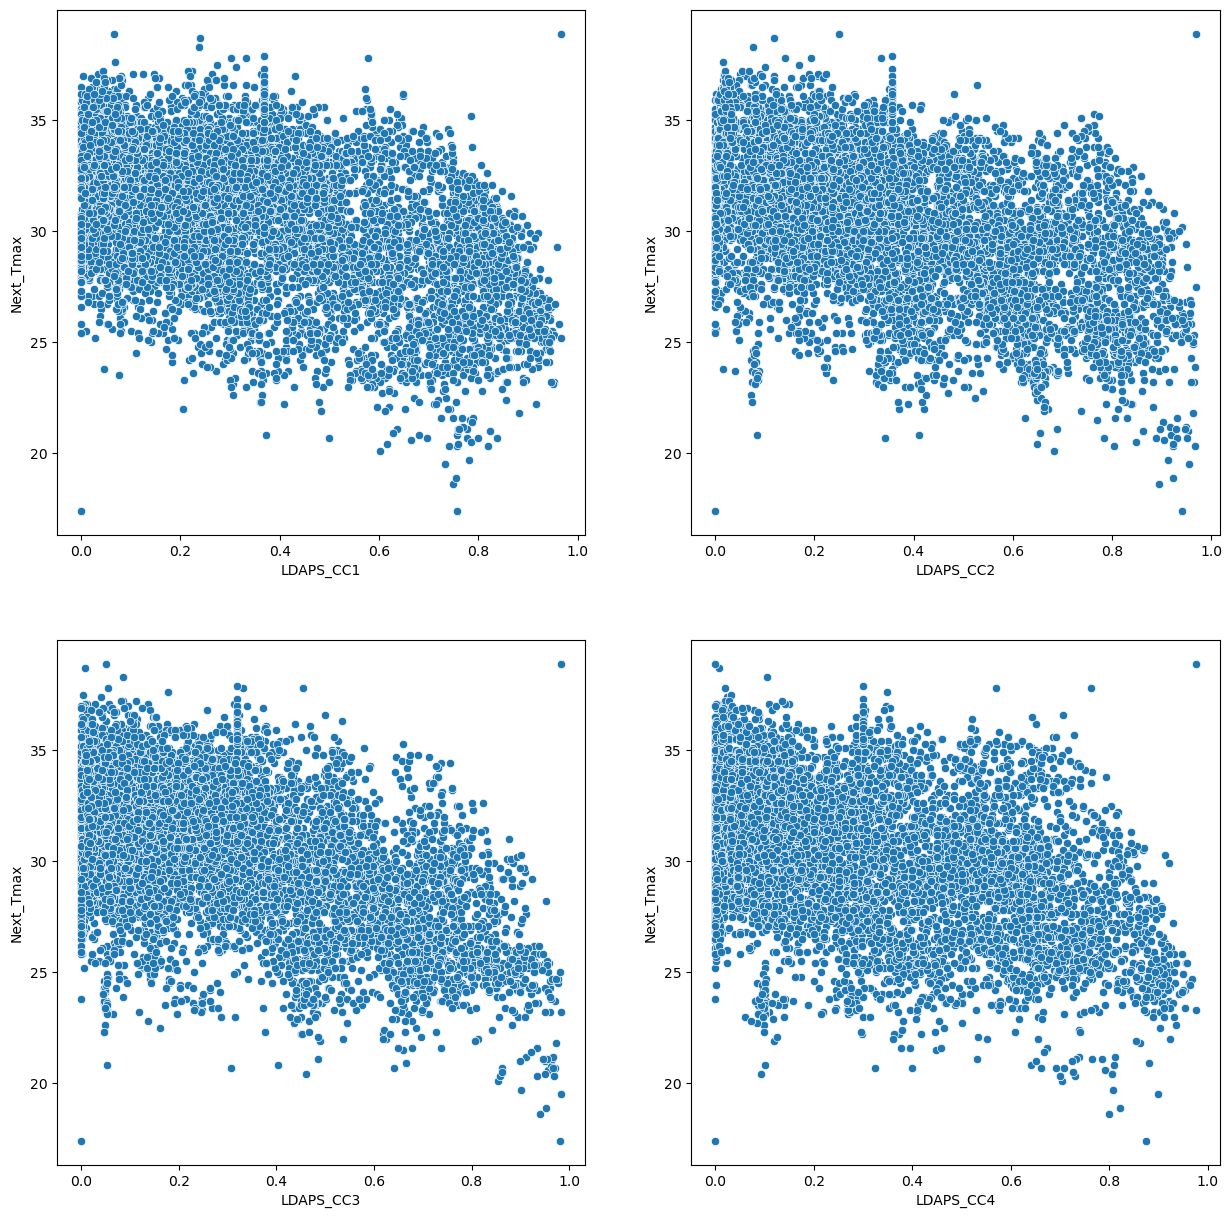

In [63]:
columns=['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']
p=1
plt.figure(figsize=(15,15))
for i in columns:
    if p<=4:
        plt.subplot(2,2,p)
        sns.scatterplot(temperatures_df,x=i,y='Next_Tmax')
    p=p+1
plt.show()

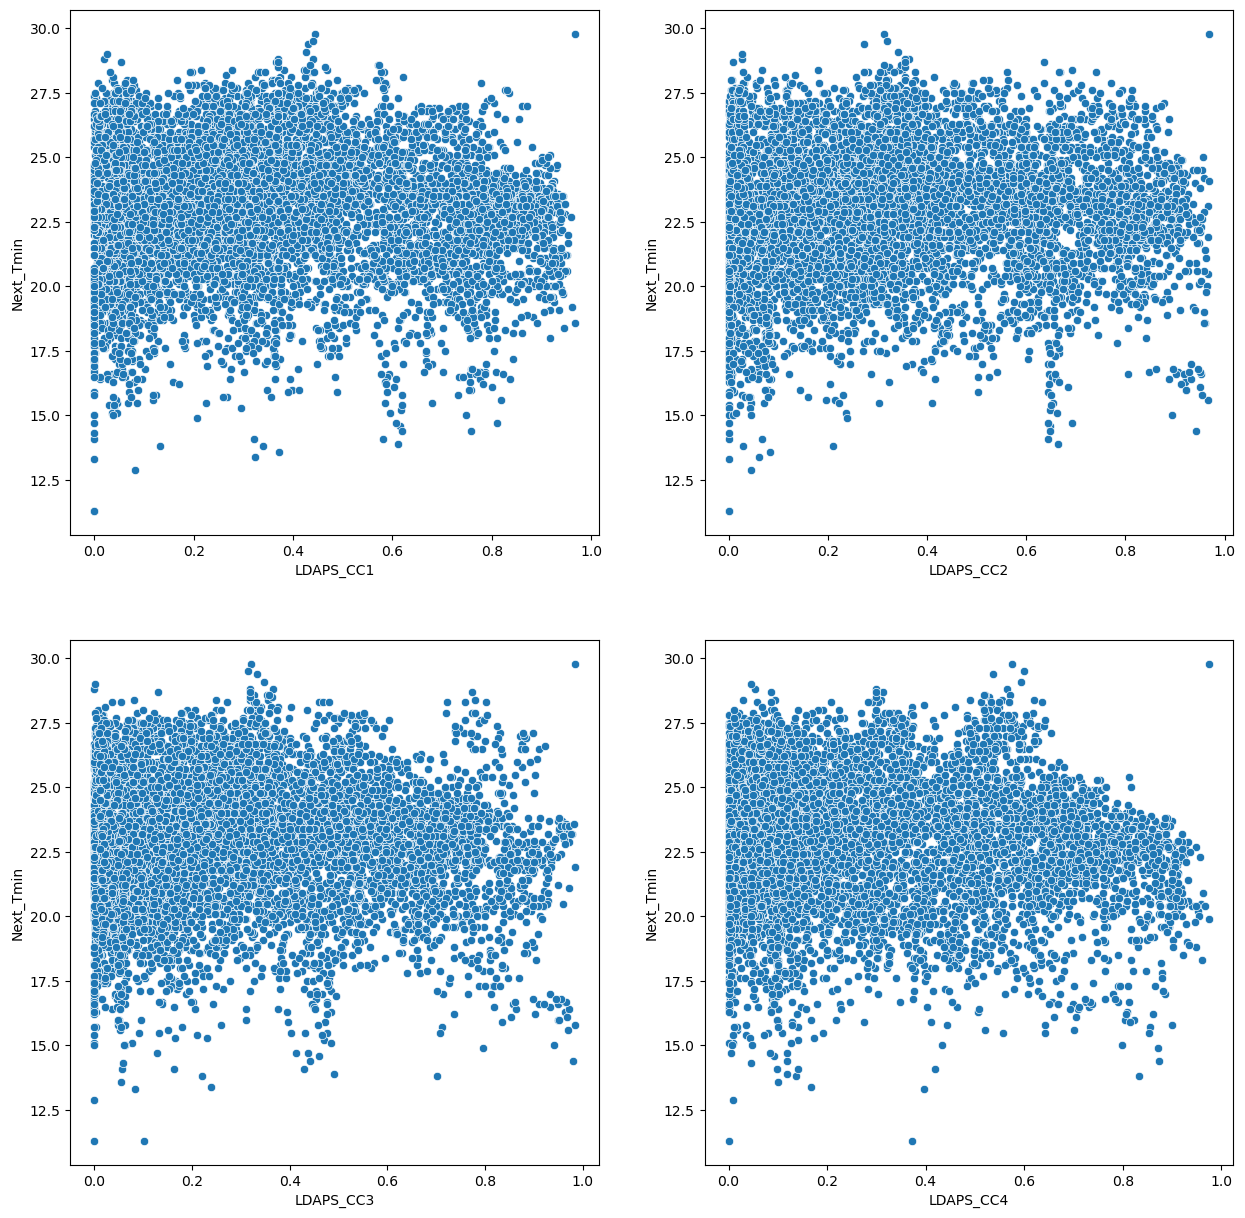

In [65]:
columns=['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']
p=1
plt.figure(figsize=(15,15))
for i in columns:
    if p<=4:
        plt.subplot(2,2,p)
        sns.scatterplot(temperatures_df,x=i,y='Next_Tmin')
    p=p+1
plt.show()

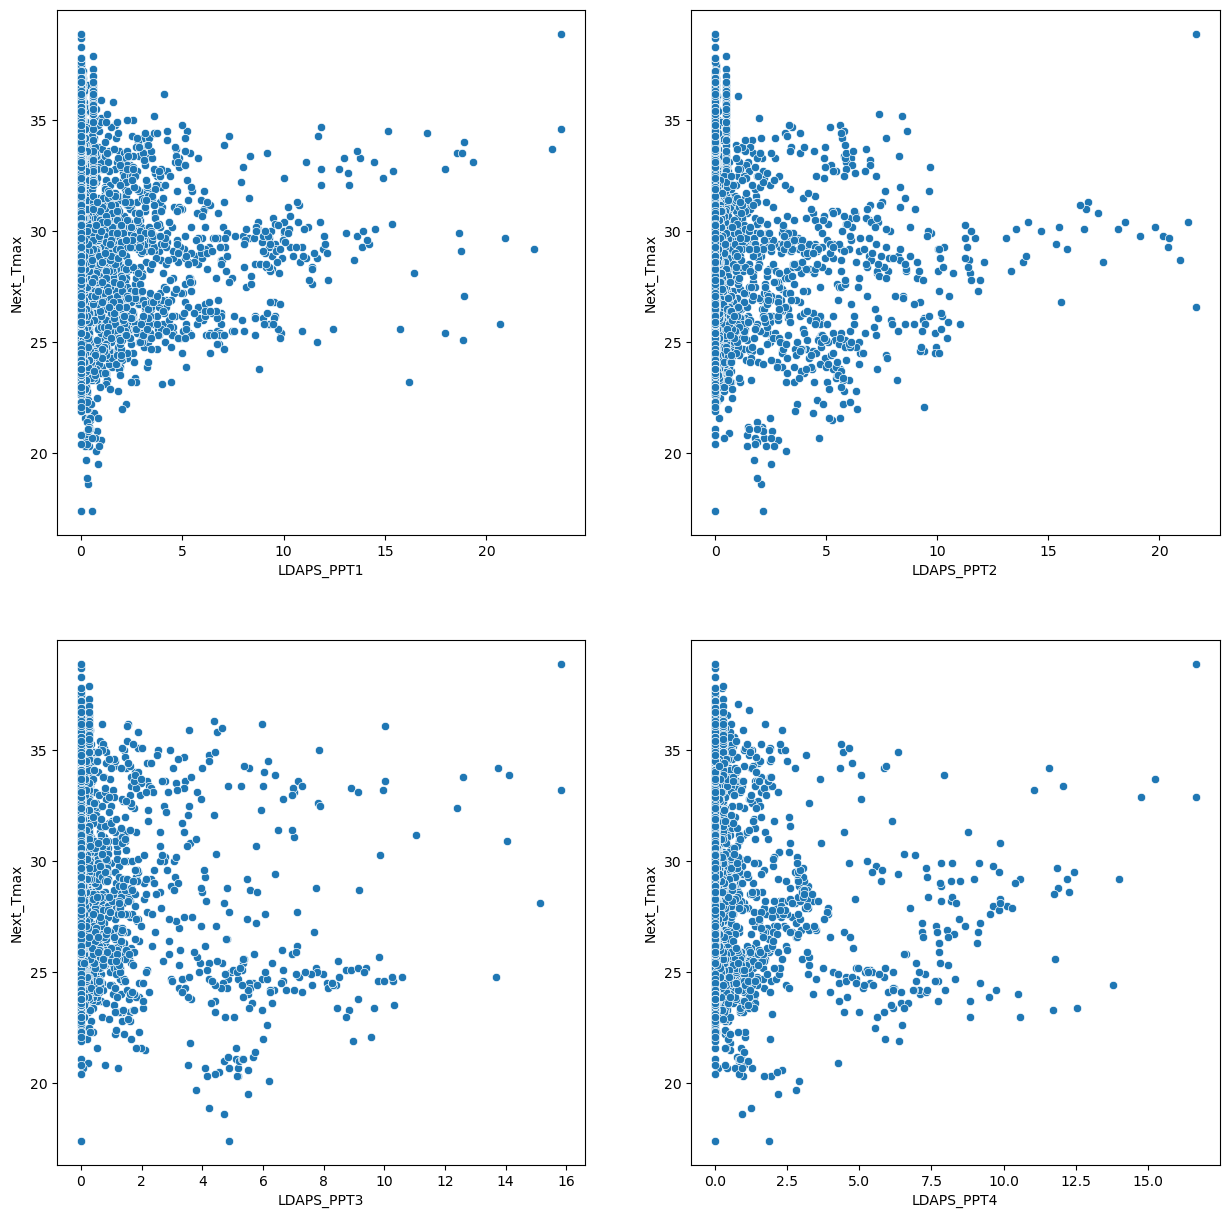

In [66]:
columns=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
p=1
plt.figure(figsize=(15,15))
for i in columns:
    if p<=4:
        plt.subplot(2,2,p)
        sns.scatterplot(temperatures_df,x=i,y='Next_Tmax')
    p=p+1
plt.show()

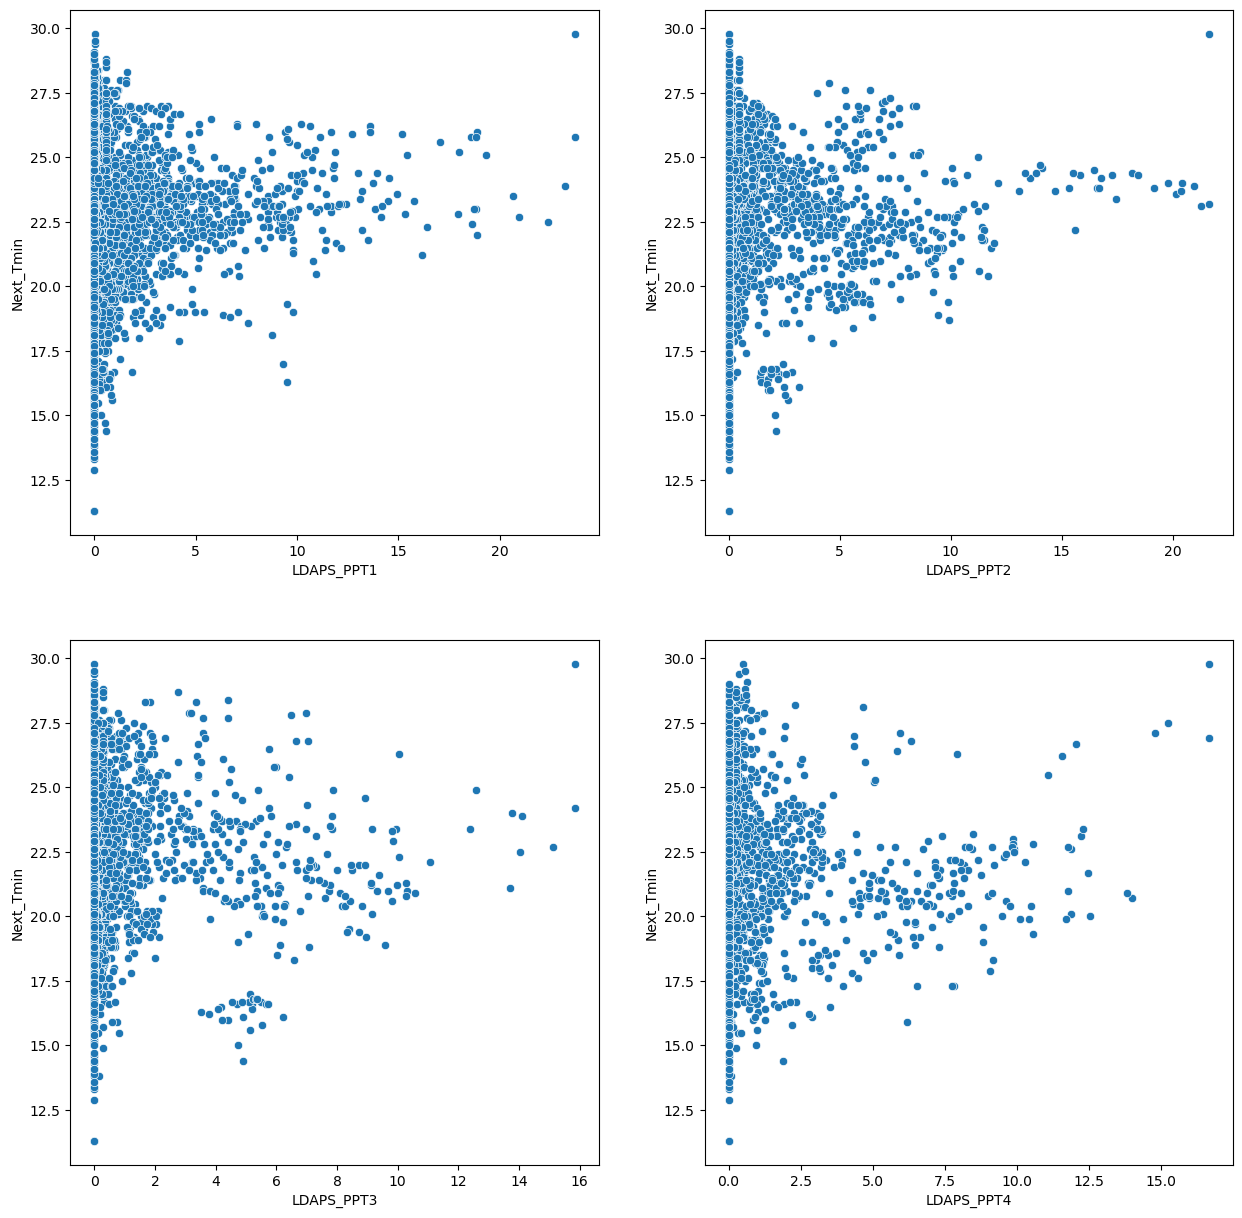

In [69]:
columns=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
p=1
plt.figure(figsize=(15,15))
for i in columns:
    if p<=4:
        plt.subplot(2,2,p)
        sns.scatterplot(temperatures_df,x=i,y='Next_Tmin')
    p=p+1
plt.show()

# Barplot to show the relationship between Latitude and Next day maximum temperature

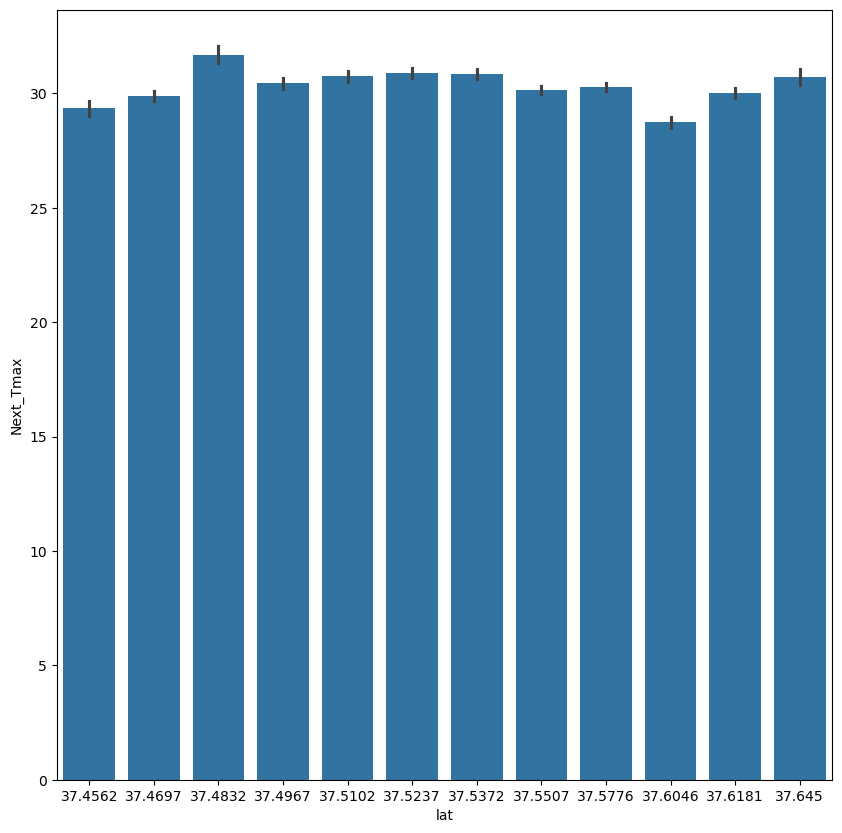

In [70]:
plt.figure(figsize=(10,10))
sns.barplot(temperatures_df,x='lat',y='Next_Tmax')
plt.show()

# Barplot to show the relationship between Latitude and Next day minimum temperature

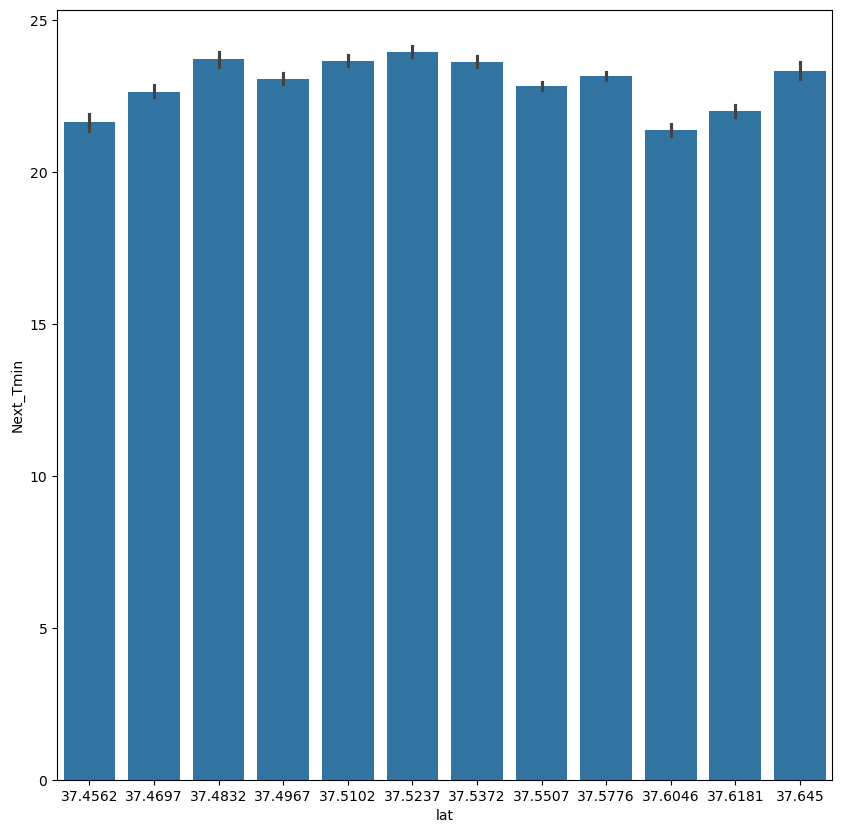

In [72]:
plt.figure(figsize=(10,10))
sns.barplot(temperatures_df,x='lat',y='Next_Tmin')
plt.show()

# Barplot to show the relationship between Longitude and Next day maximum temperature

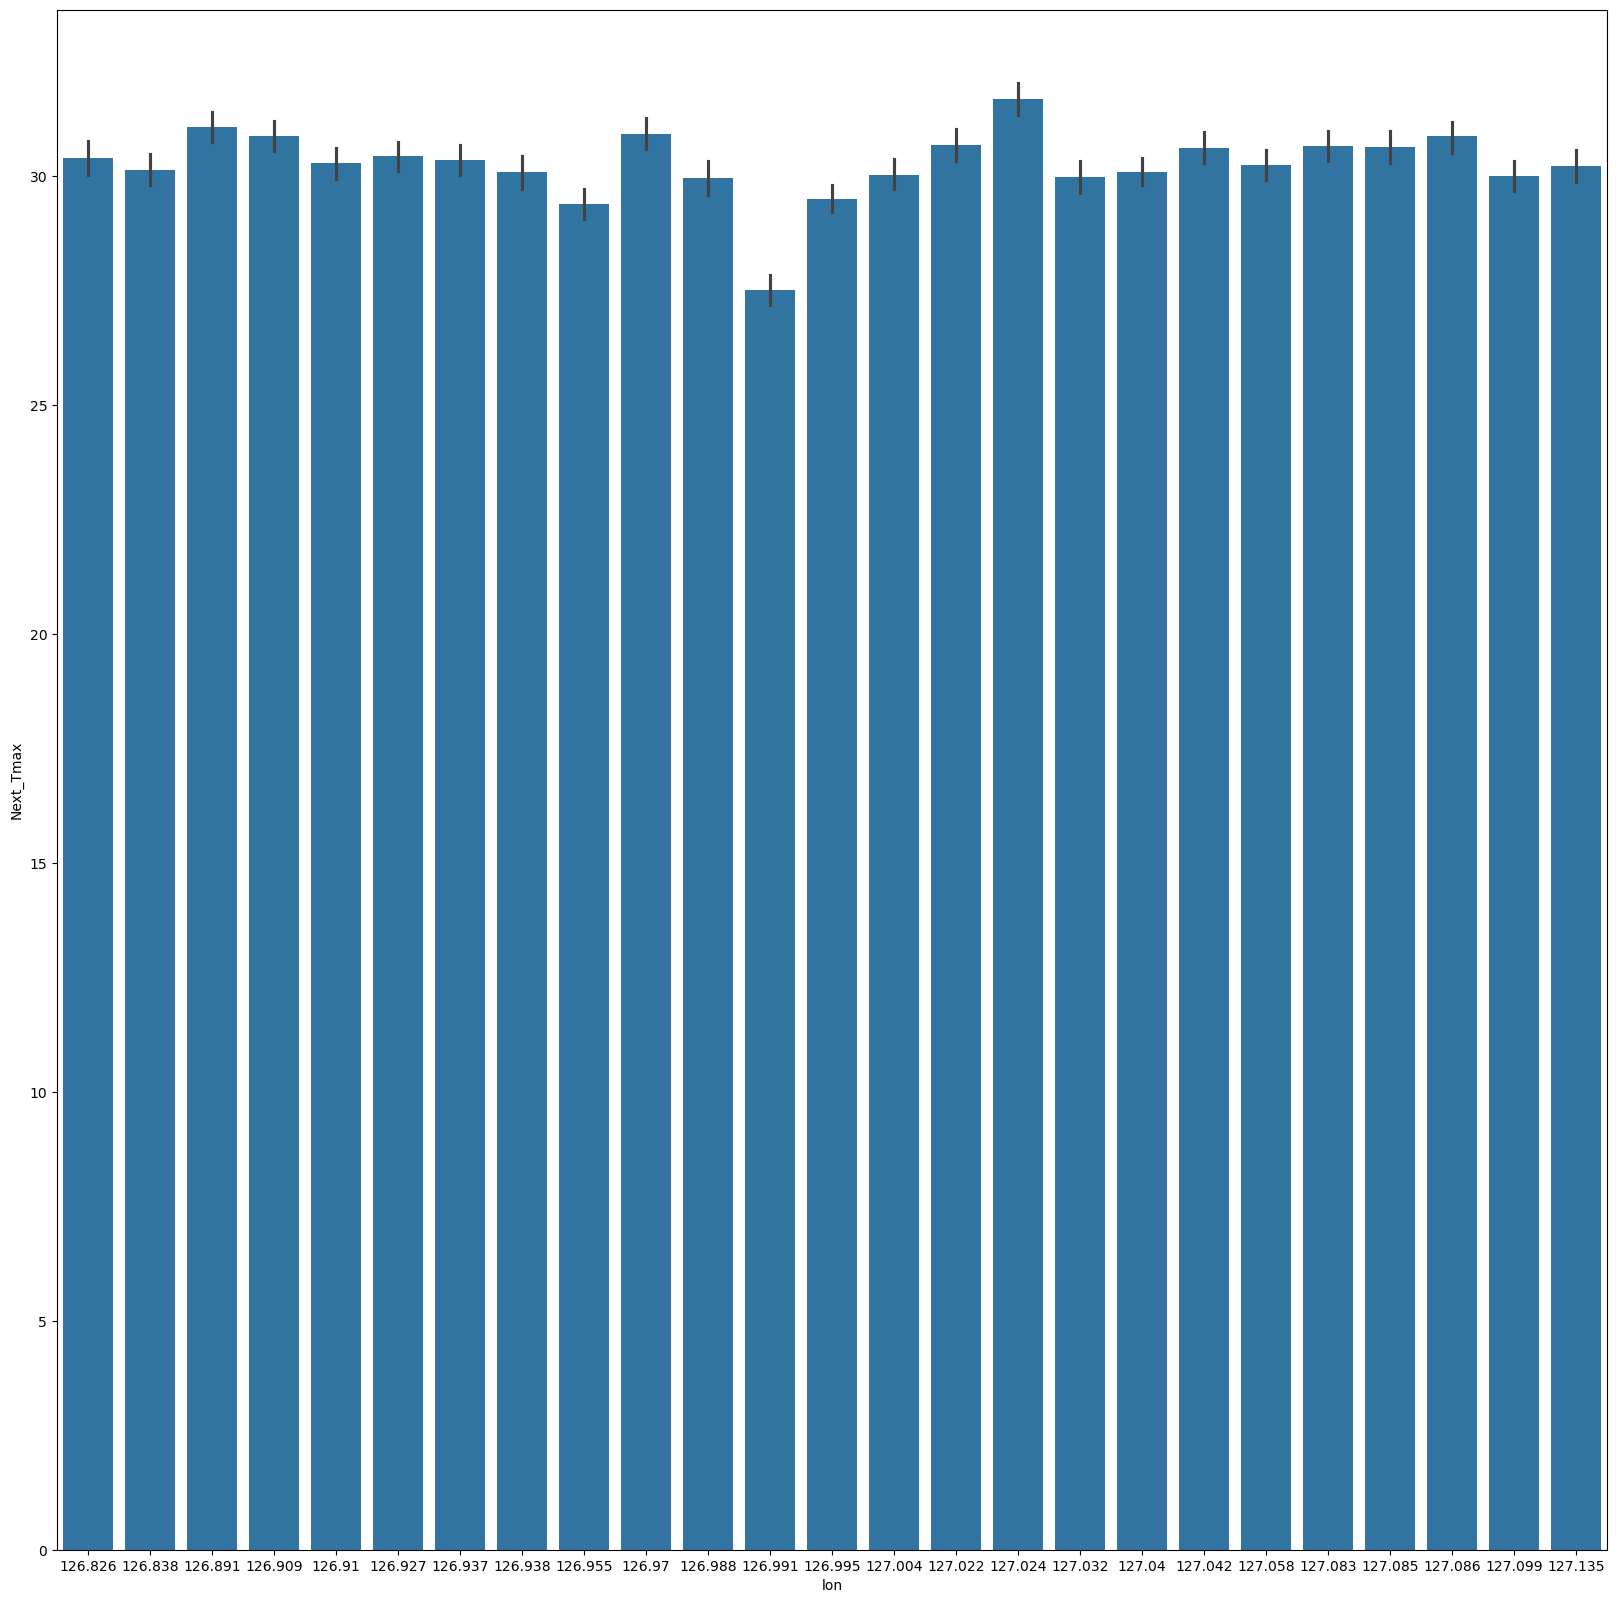

In [75]:
plt.figure(figsize=(20,20))
sns.barplot(temperatures_df,x='lon',y='Next_Tmax')
plt.show()

# Barplot to show the relationship between Longitude and Next day minimum temperature

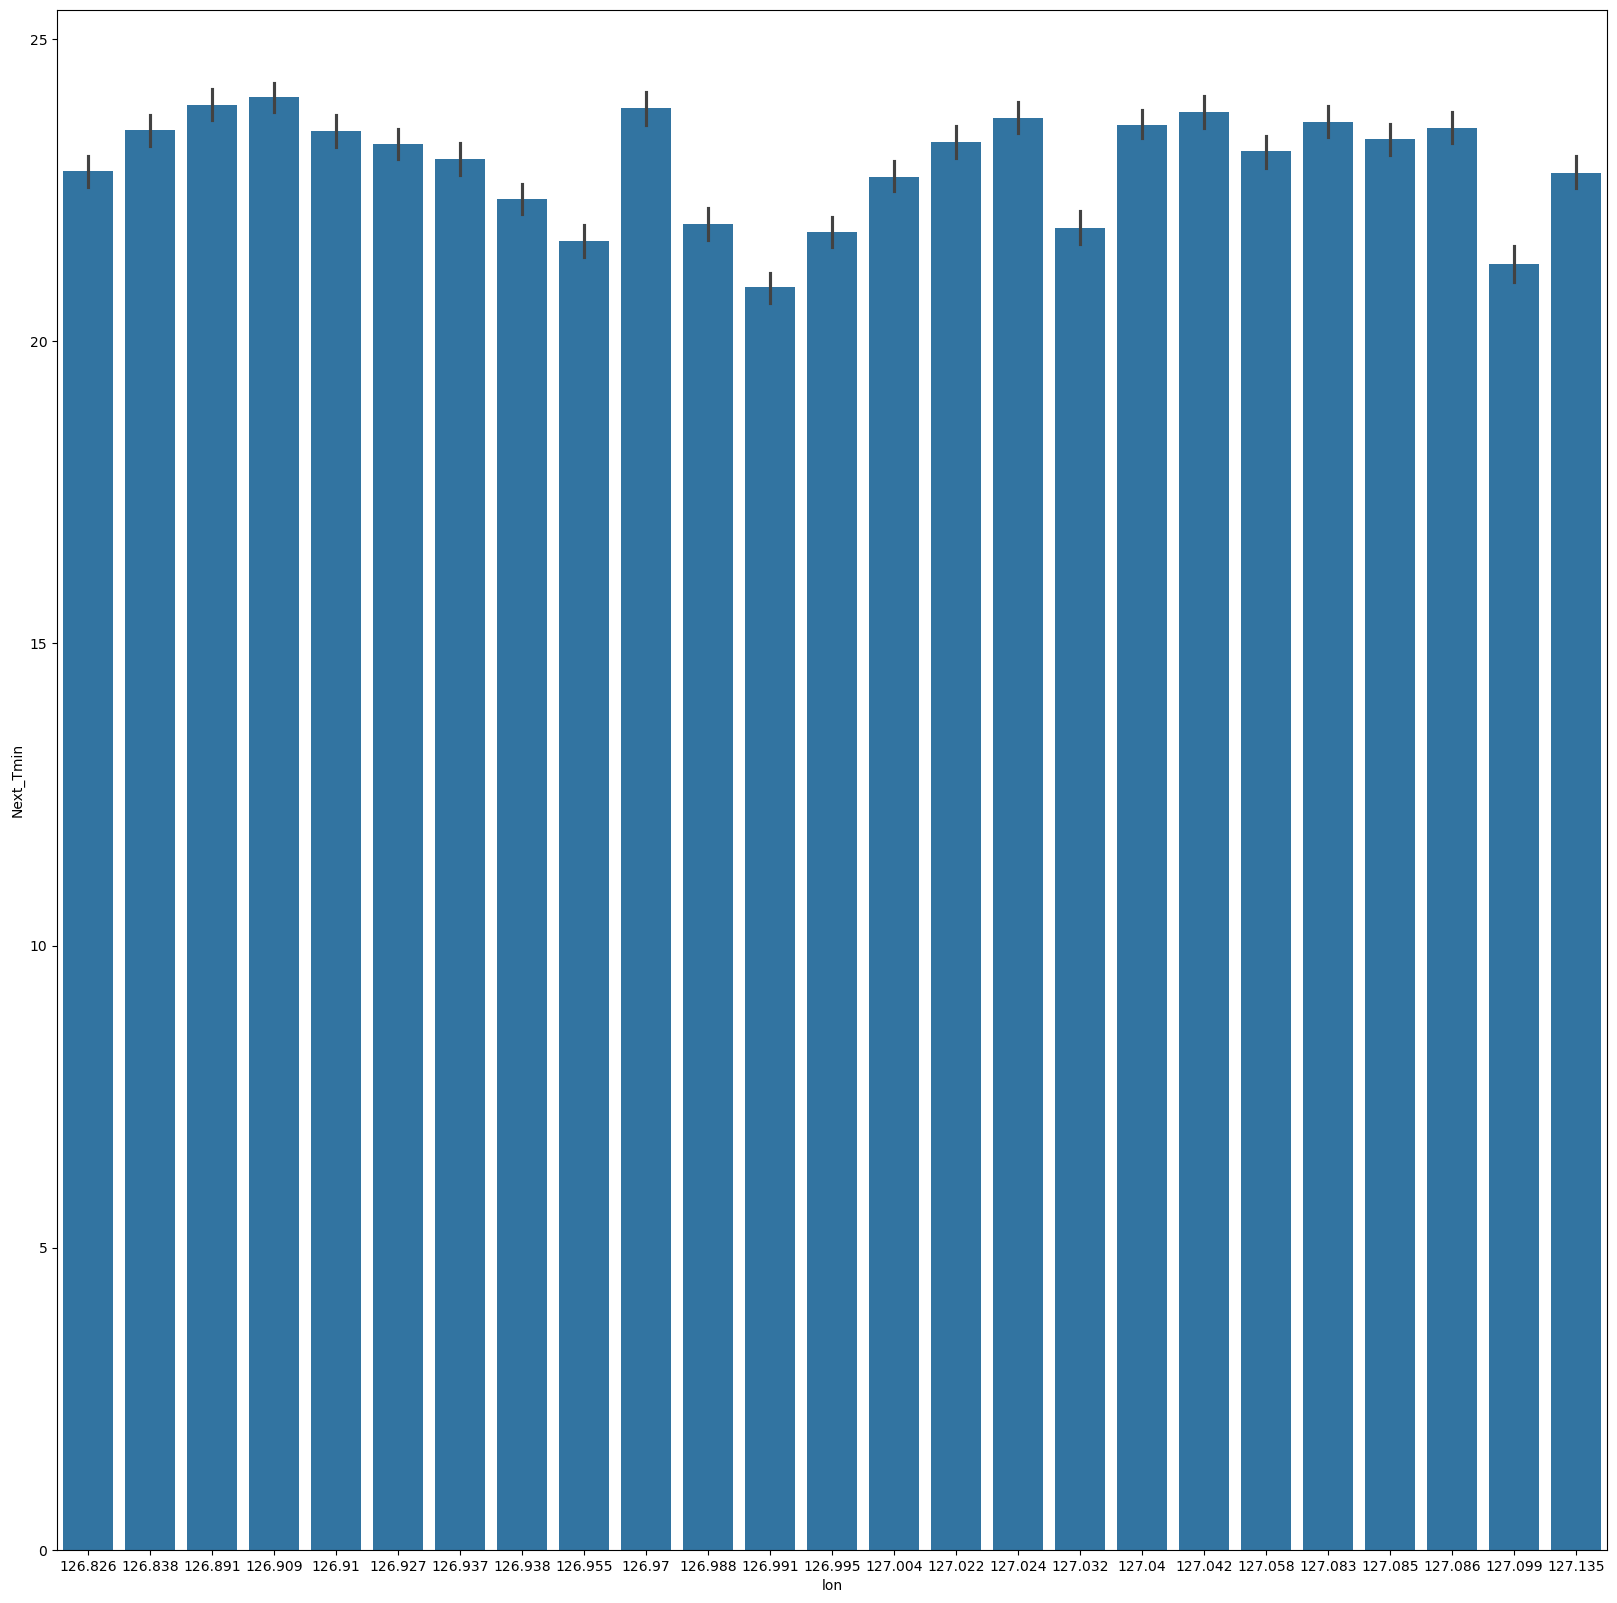

In [77]:
plt.figure(figsize=(20,20))
sns.barplot(temperatures_df,x='lon',y='Next_Tmin')
plt.show()

# Barplot to show the relationship between Elevation and Next day maximum temperature

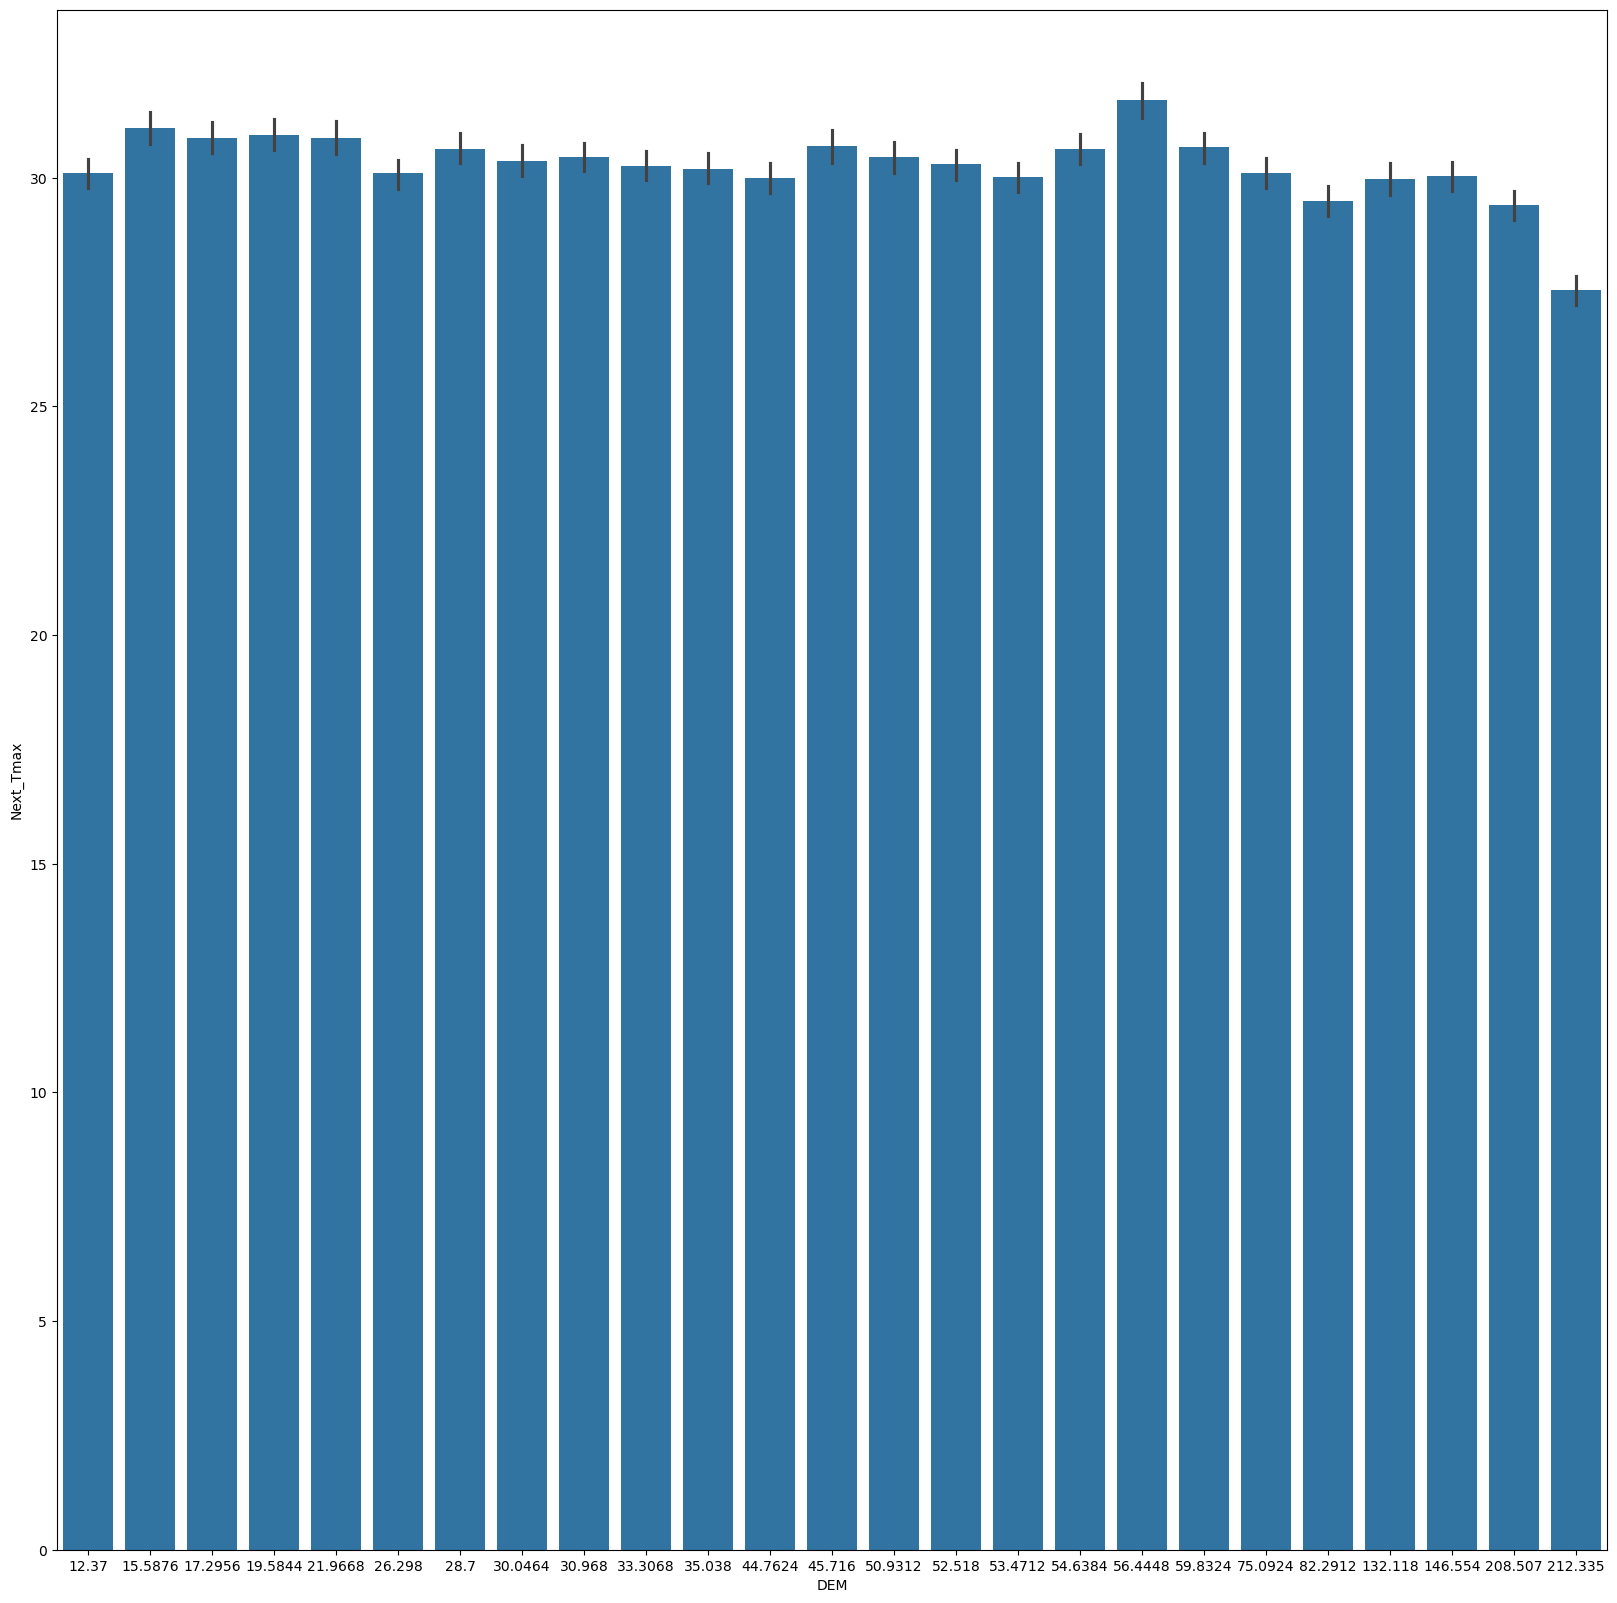

In [78]:
plt.figure(figsize=(20,20))
sns.barplot(temperatures_df,x='DEM',y='Next_Tmax')
plt.show()

# Barplot to show the relationship between Elevation and Next day minimum temperature

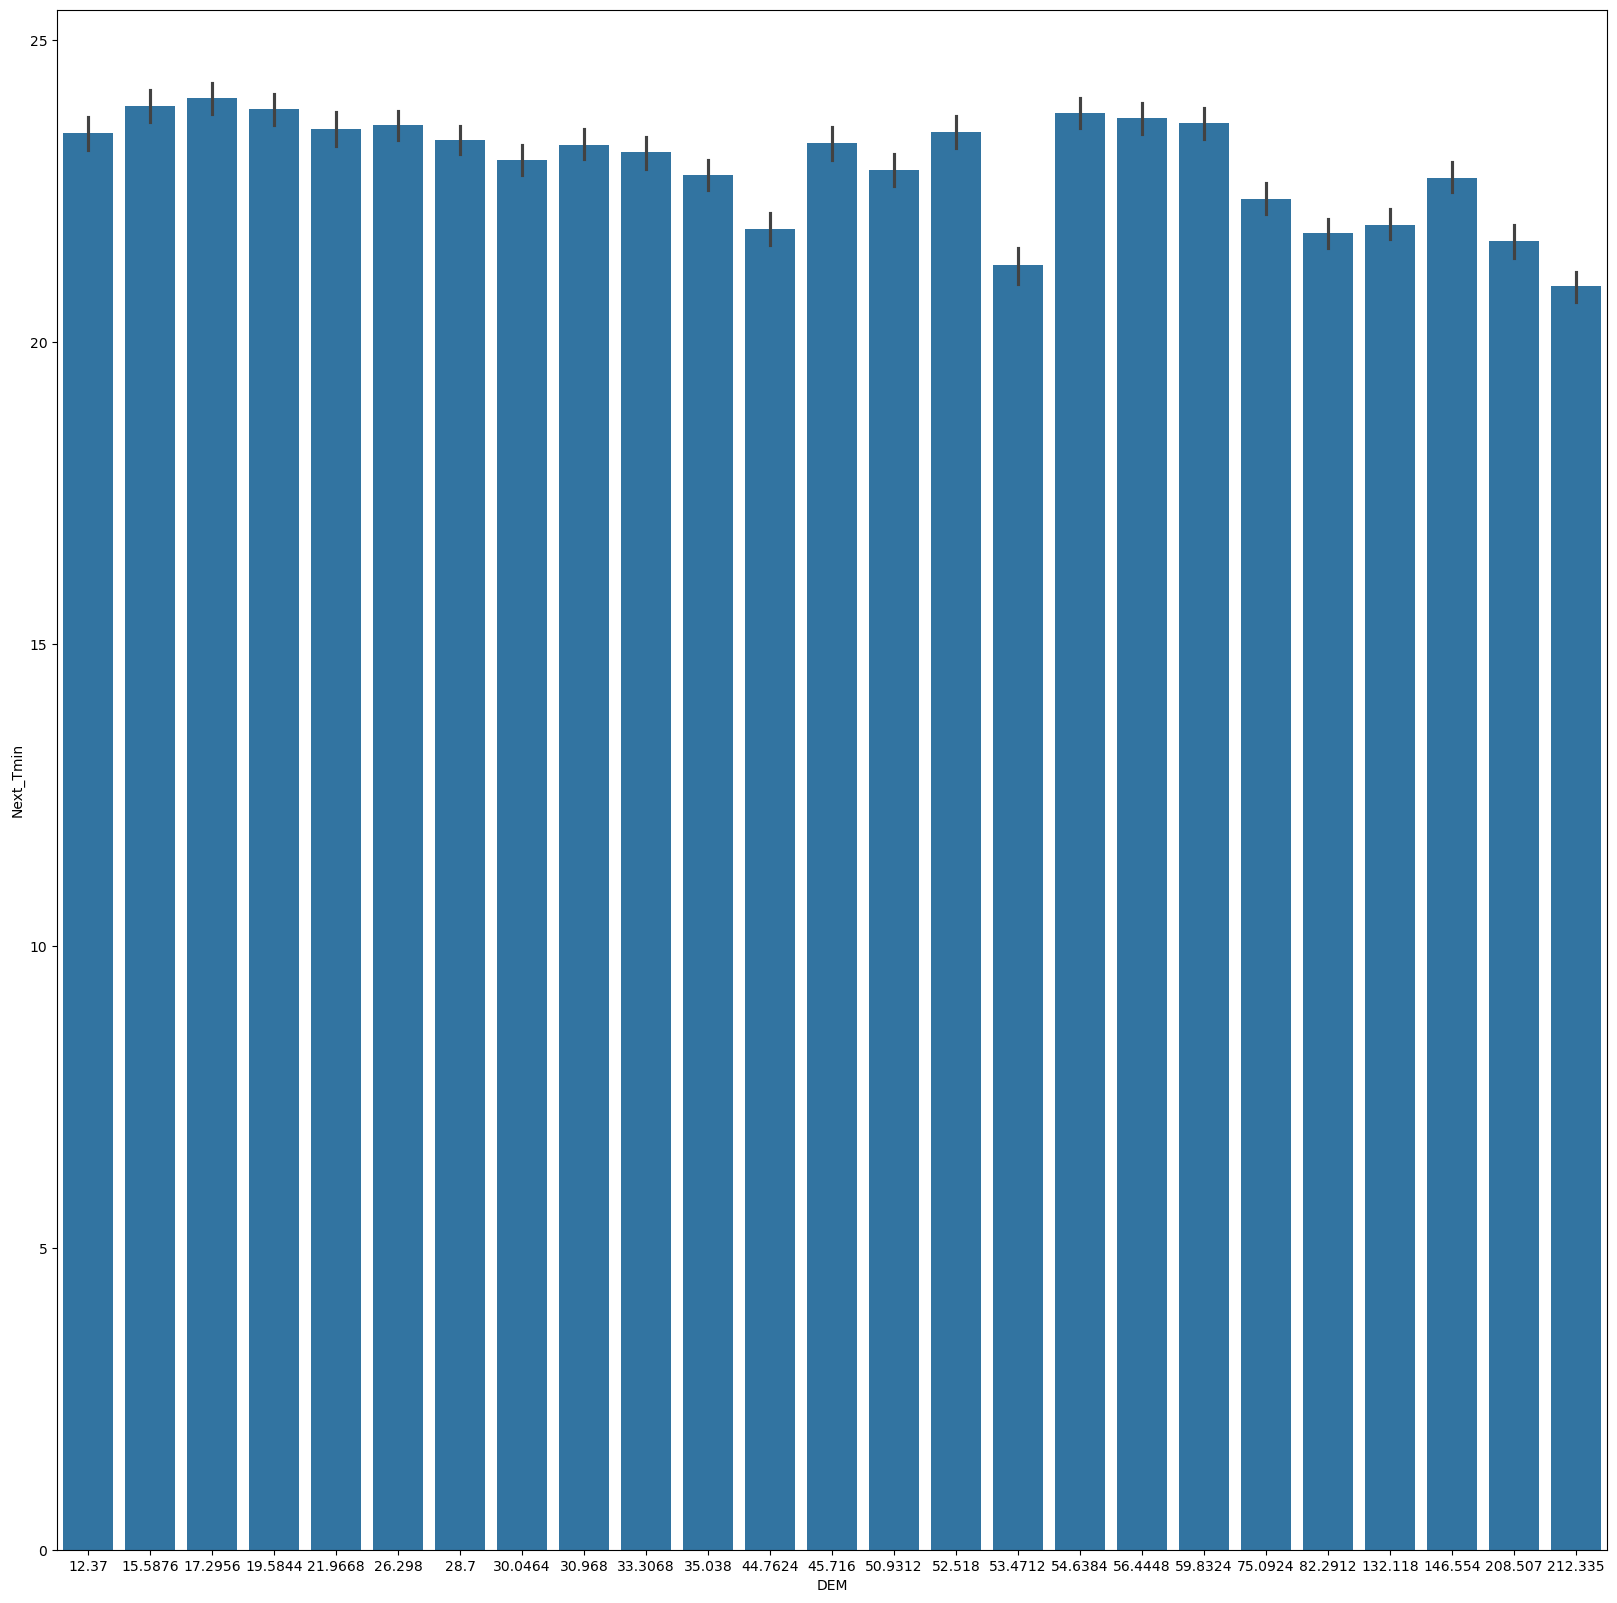

In [79]:
plt.figure(figsize=(20,20))
sns.barplot(temperatures_df,x='DEM',y='Next_Tmin')
plt.show()

# Barplot to show the relationship between Slope and Next day maximum temperature

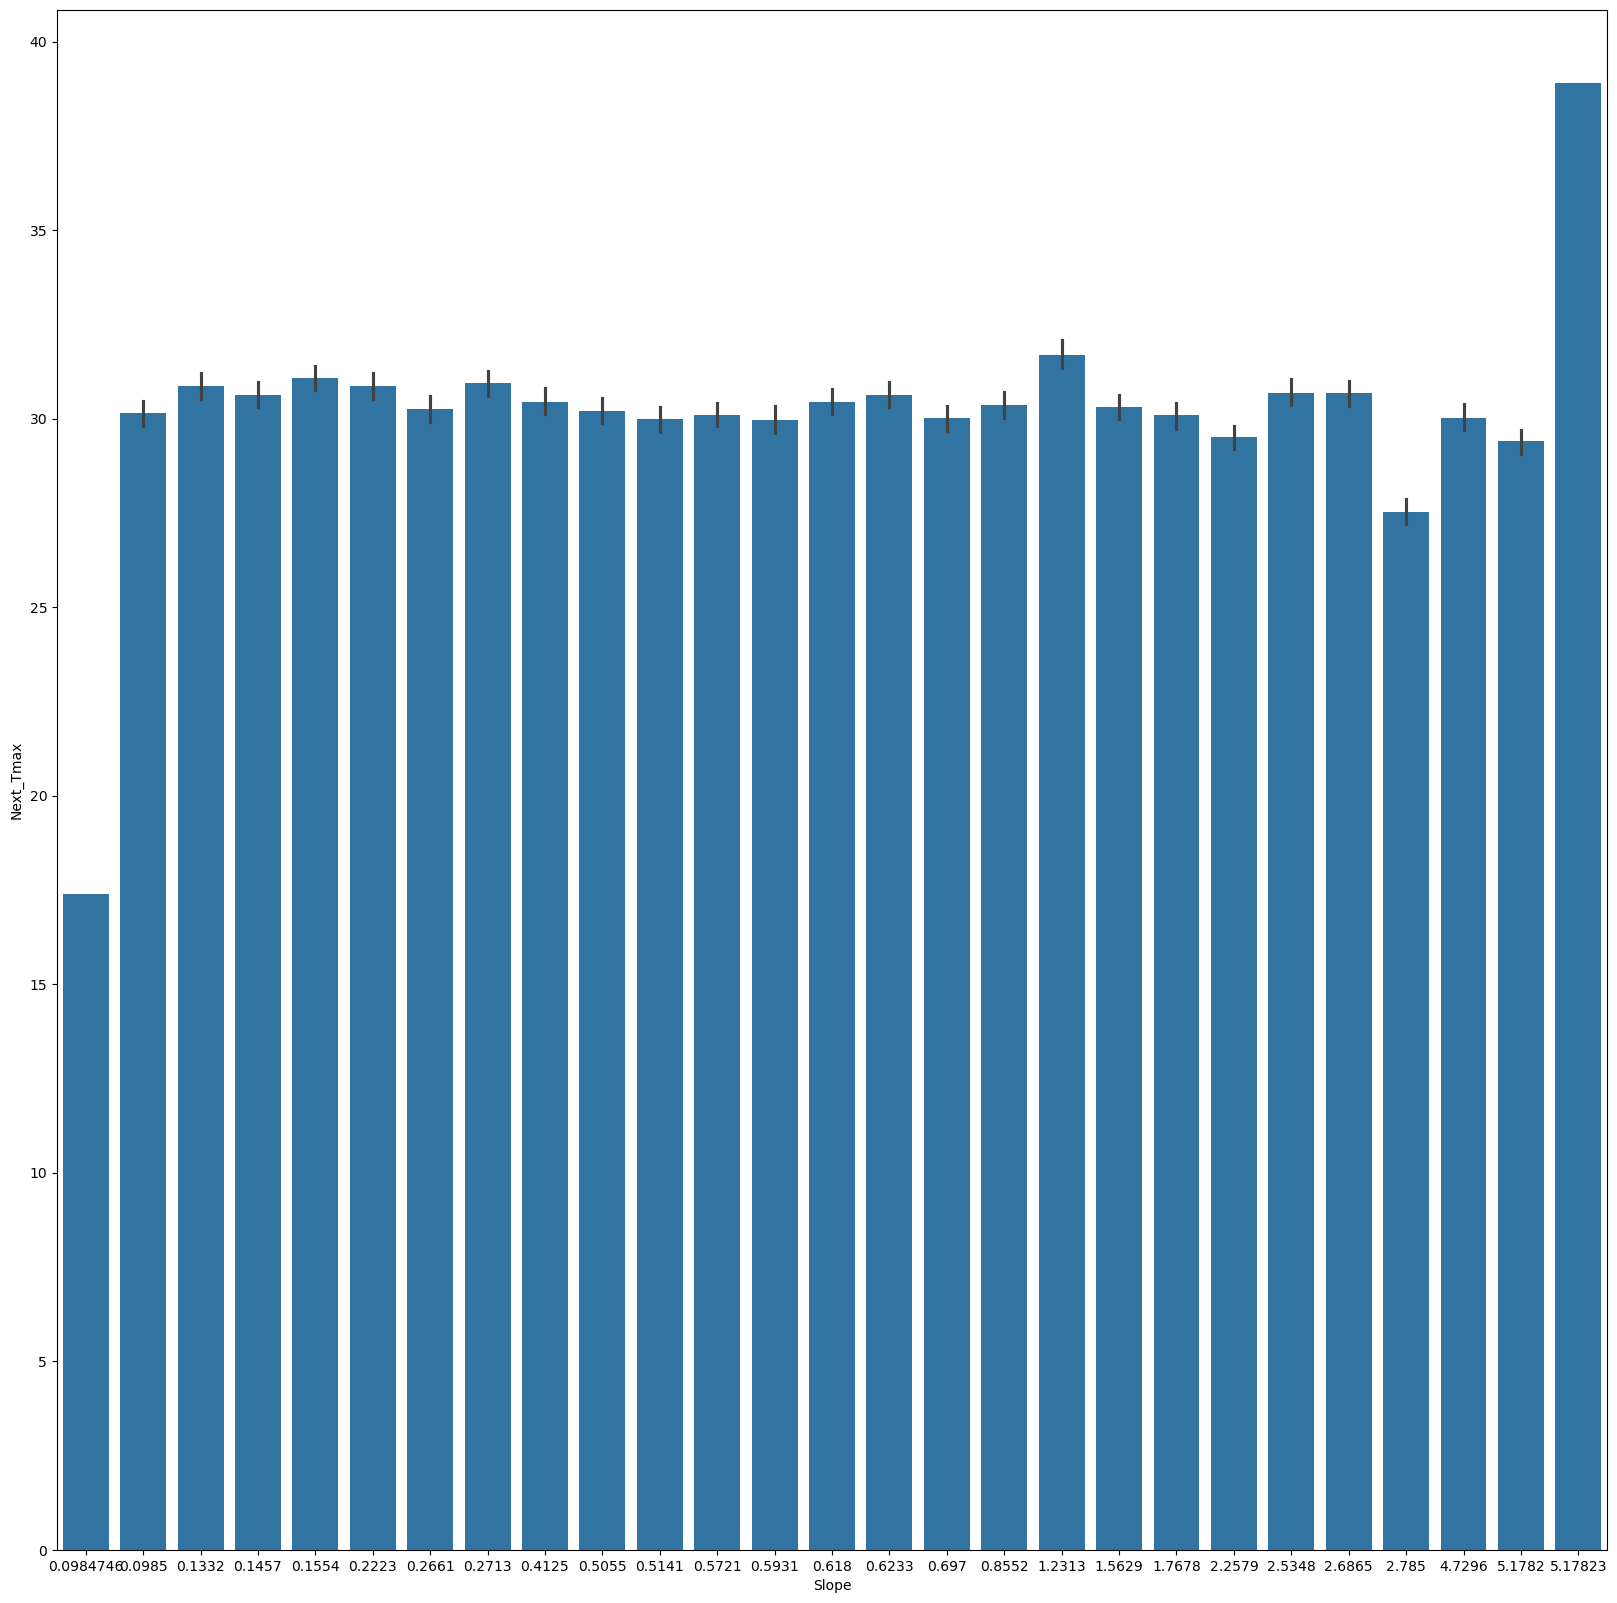

In [80]:
plt.figure(figsize=(20,20))
sns.barplot(temperatures_df,x='Slope',y='Next_Tmax')
plt.show()

# Barplot to show the relationship between slope and Next day minimum temperature

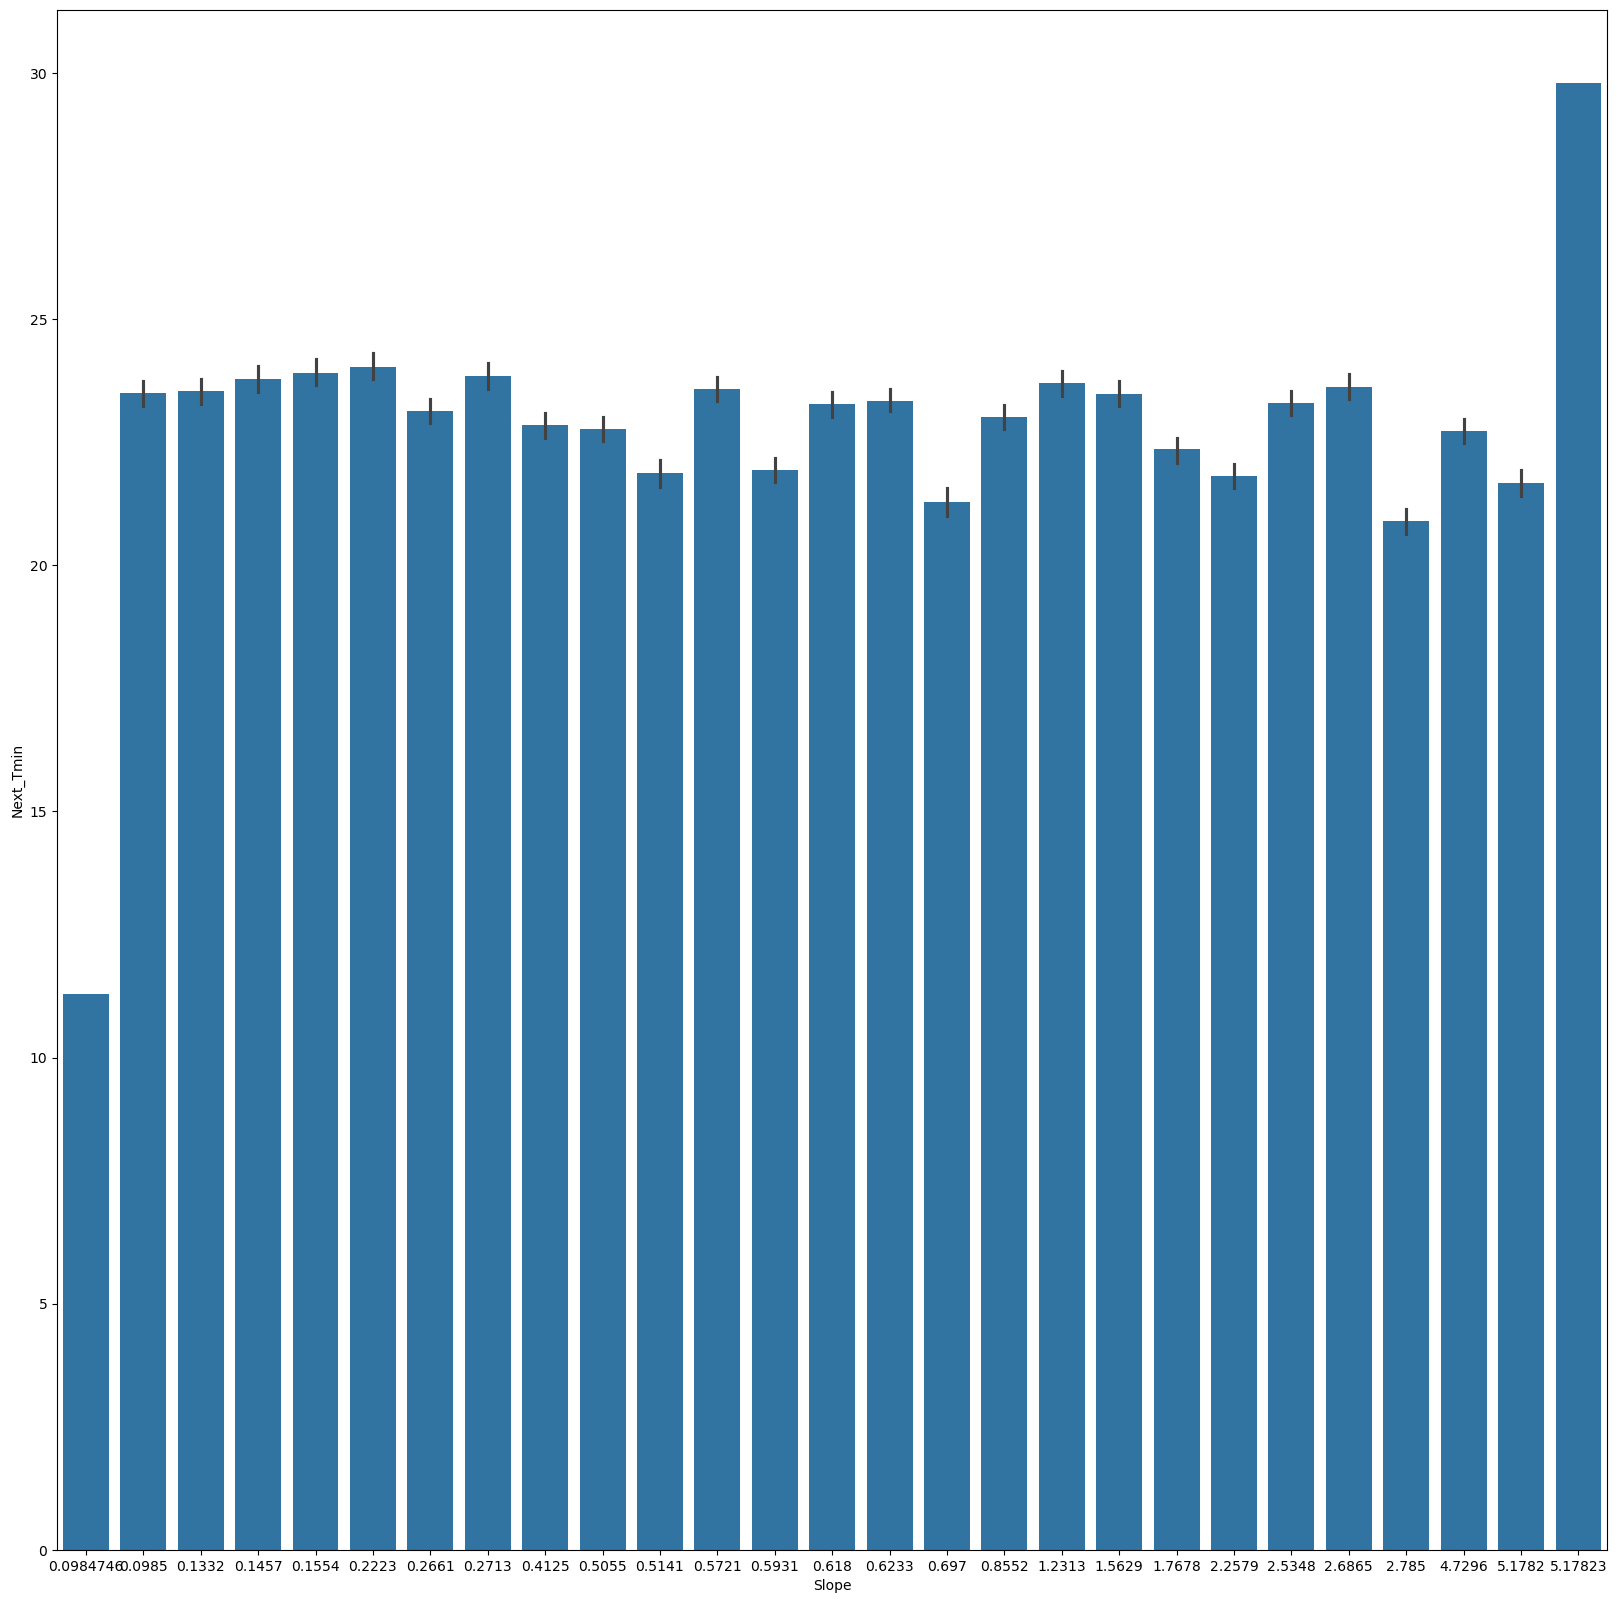

In [85]:
plt.figure(figsize=(20,20))
sns.barplot(temperatures_df,x='Slope',y='Next_Tmin')
plt.show()

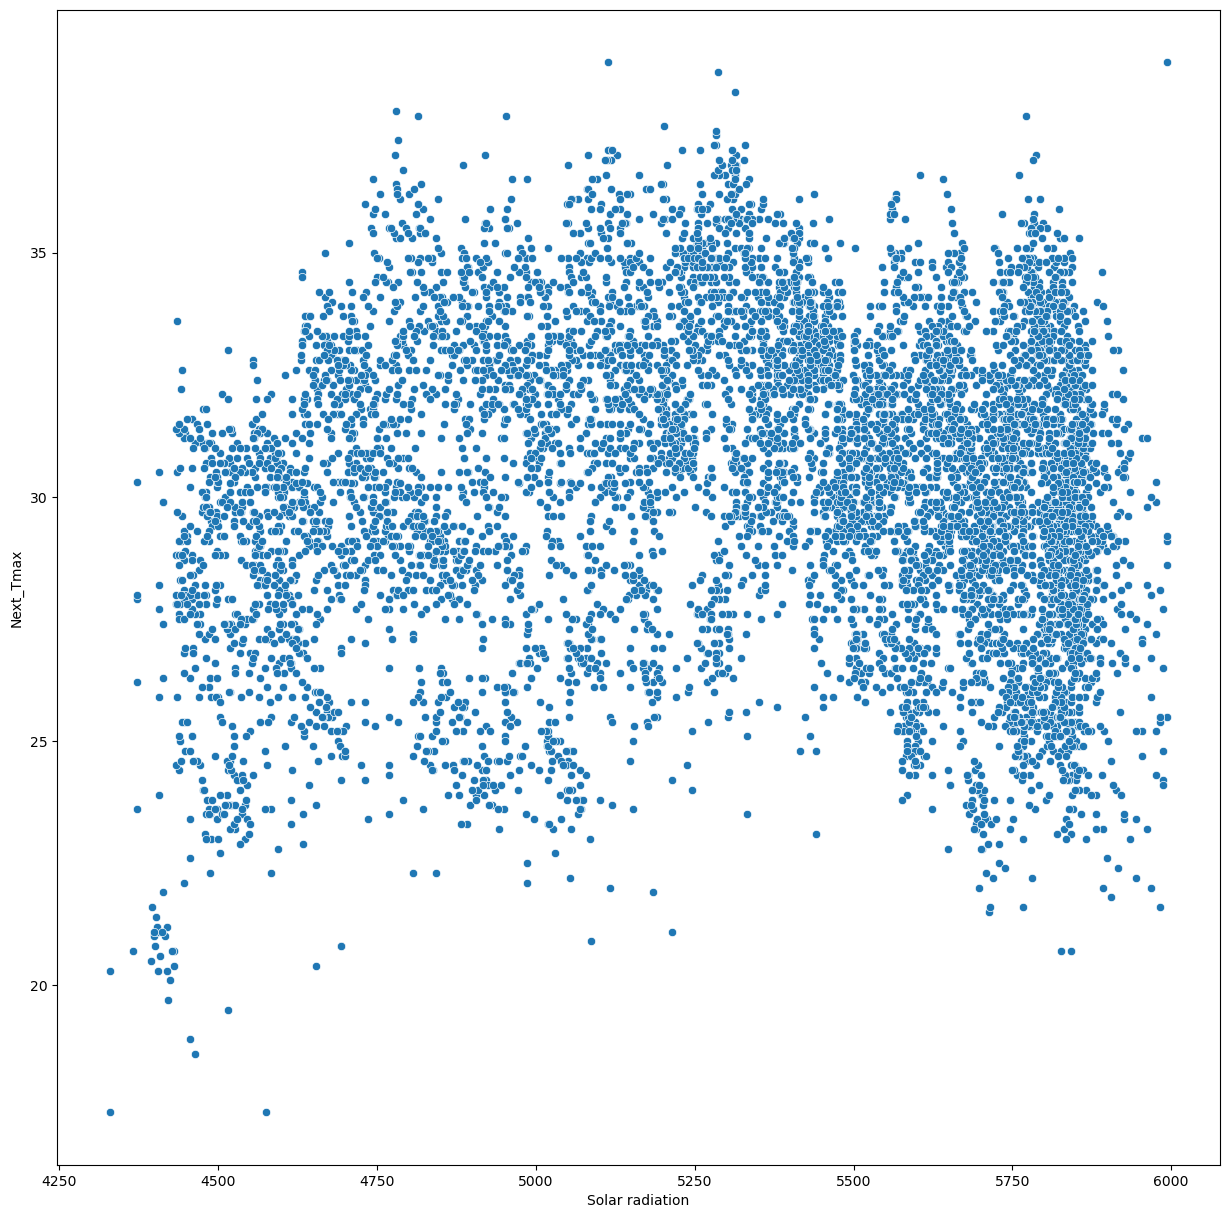

In [86]:
plt.figure(figsize=(15,15))
sns.scatterplot(temperatures_df,x='Solar radiation',y='Next_Tmax')
plt.show()

# Check for the skewness in the dataset using distplot

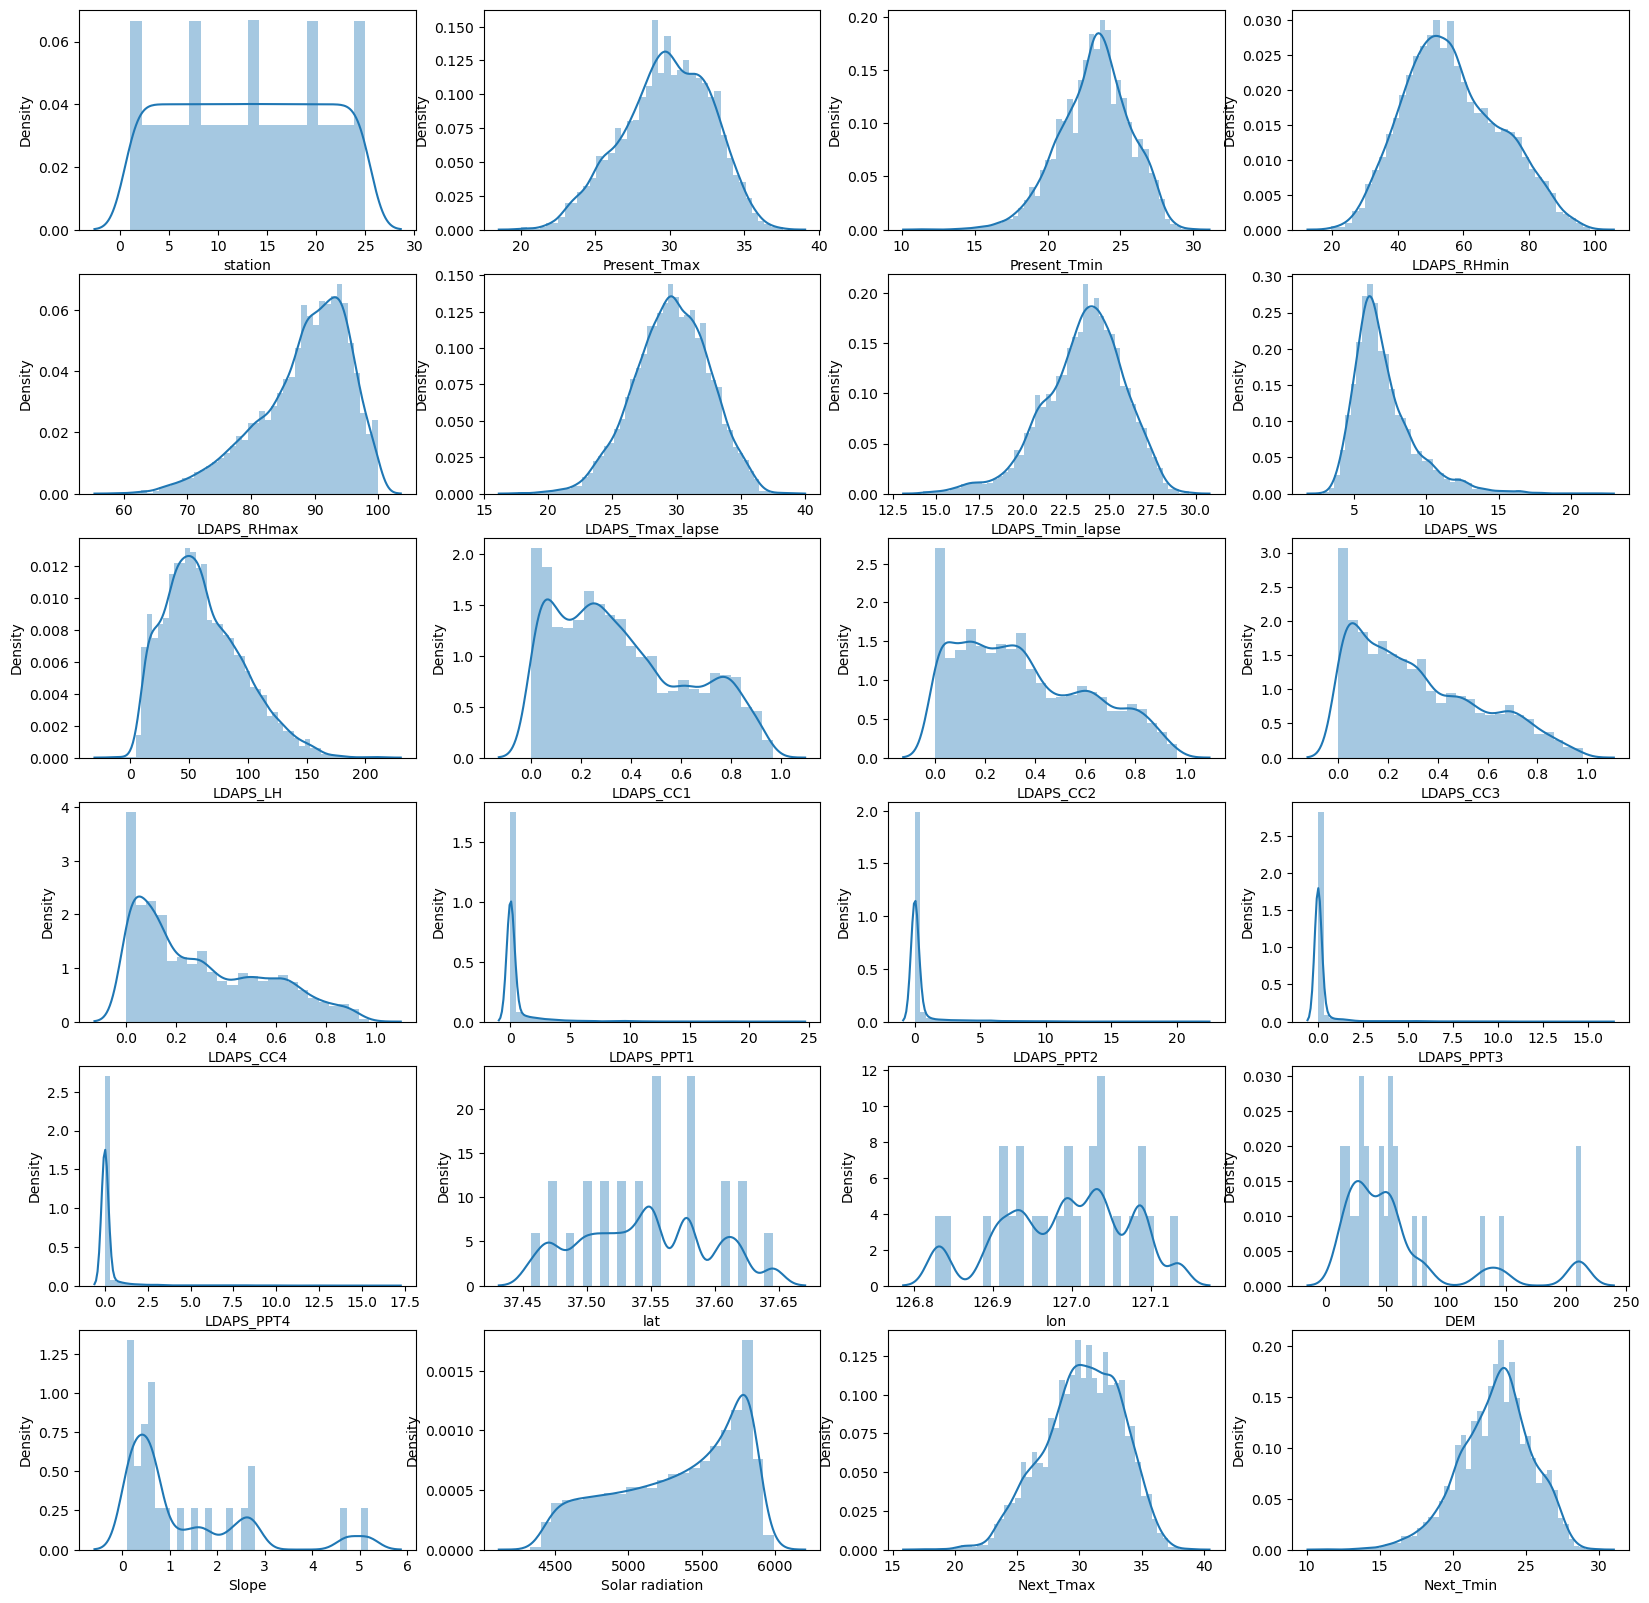

In [87]:
plt.figure(figsize=(20,20))
p=1
for i in temperatures_df:
    if p<=24:
        plt.subplot(6,4,p)
        sns.distplot(temperatures_df[i])
    p=p+1
plt.show()

# Check for the skewness in the dataset using skew method

In [90]:
temperatures_df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

# Apply PowerTransformer technique to remove skewness in the dataset

In [93]:
columns_to_transform=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']
pt=PowerTransformer()
temperatures_df[columns_to_transform]=pt.fit_transform(temperatures_df[columns_to_transform])

In [95]:
temperatures_df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.115143
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.017827
LDAPS_WS            0.002408
LDAPS_LH            0.057403
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.087933
LDAPS_CC4           0.126895
LDAPS_PPT1          1.404189
LDAPS_PPT2          1.577808
LDAPS_PPT3          1.747820
LDAPS_PPT4          1.963848
lat                 0.087062
lon                -0.285213
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

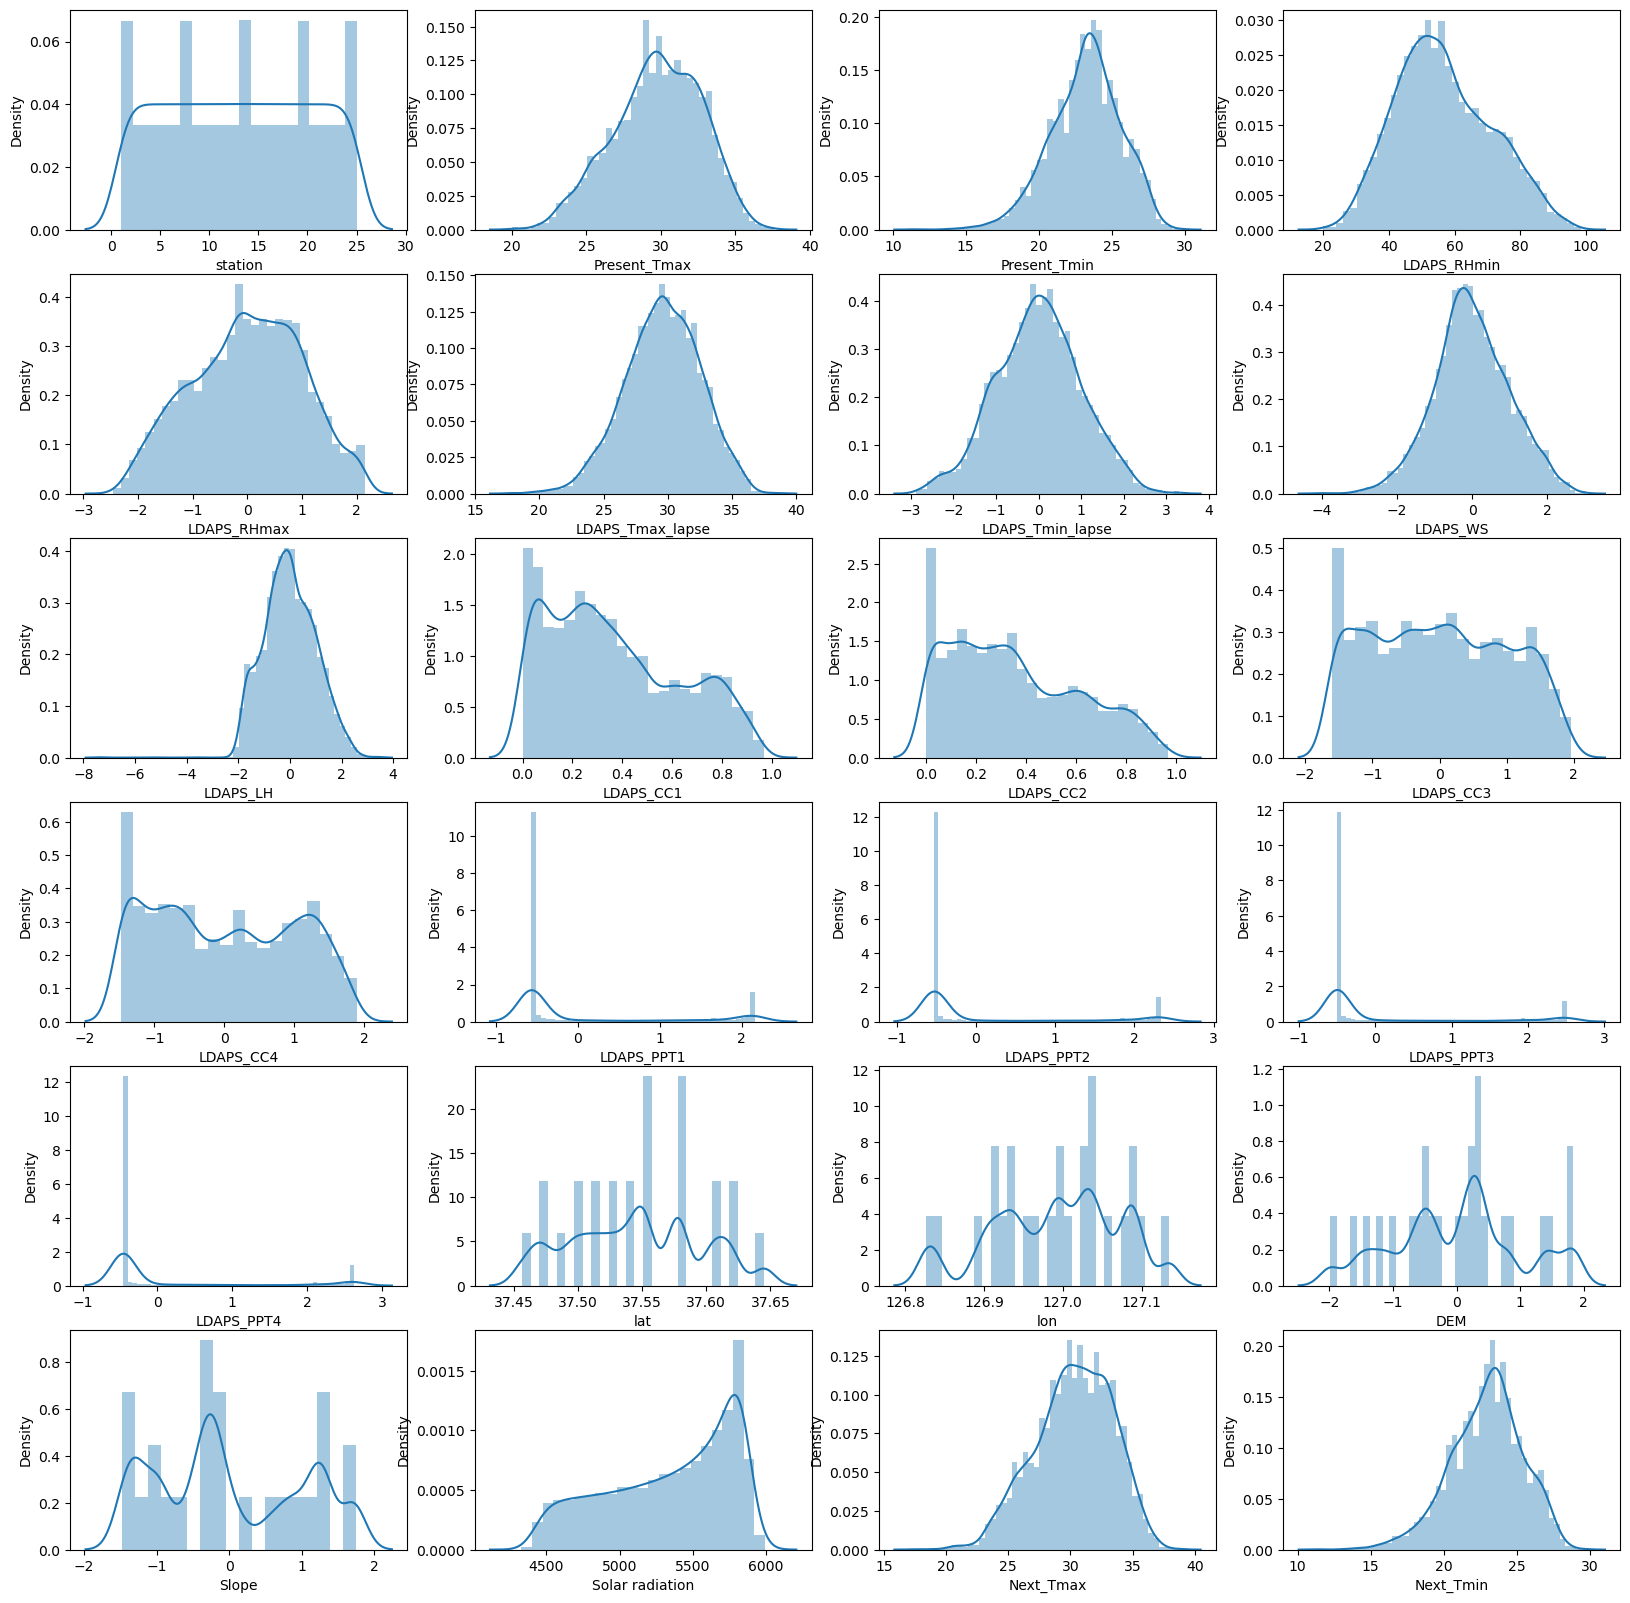

In [97]:
#skewness is removed in the dataset
plt.figure(figsize=(20,20))
p=1
for i in temperatures_df:
    if p<=24:
        plt.subplot(6,4,p)
        sns.distplot(temperatures_df[i])
    p=p+1
plt.show()

# Check for the outliers in the dataset using boxplot

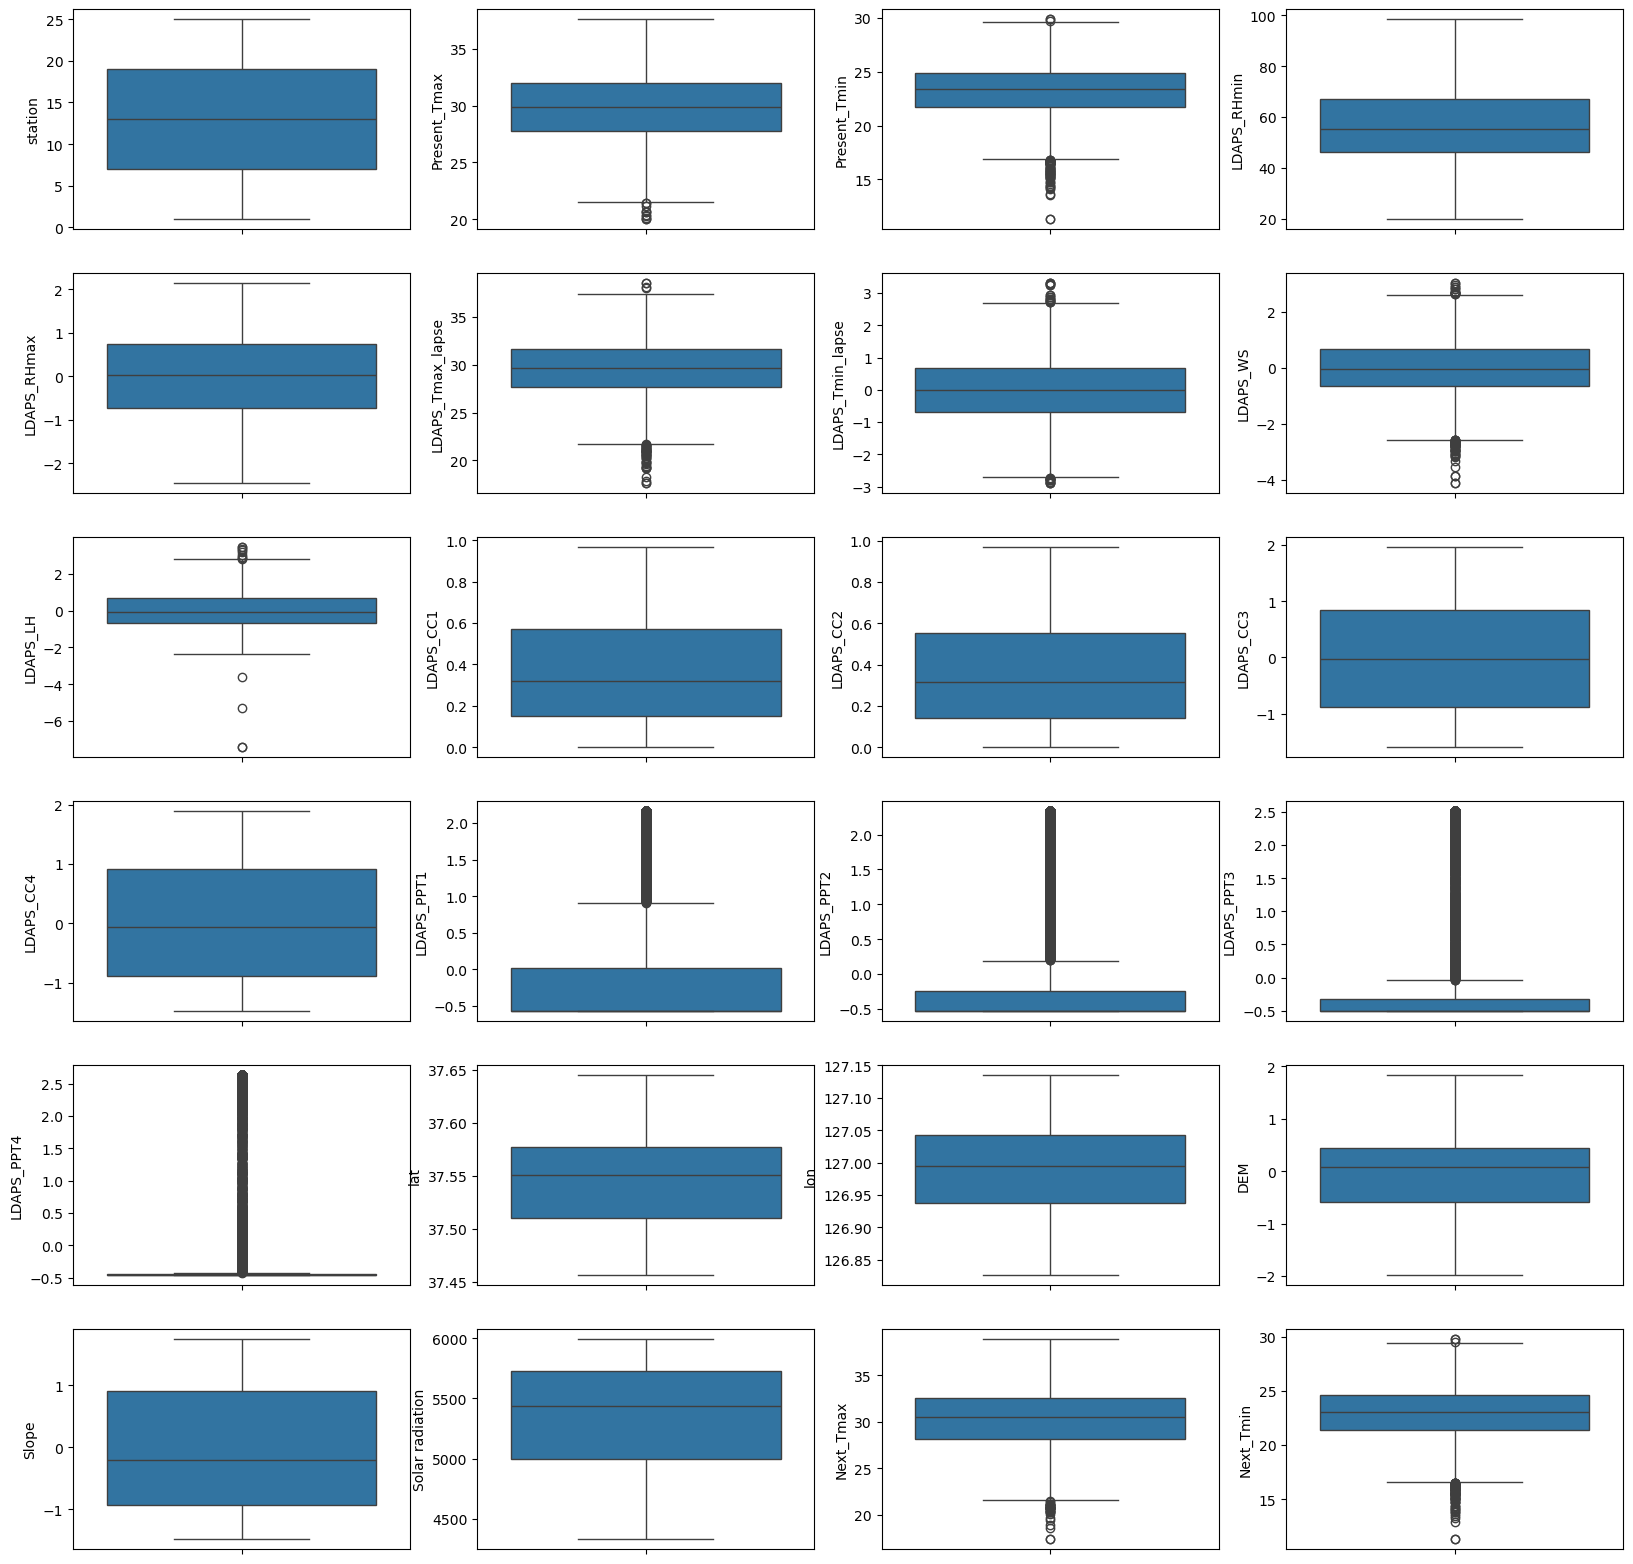

In [98]:
plt.figure(figsize=(20,20))
p=1
for i in temperatures_df:
    if p<=24:
        plt.subplot(6,4,p)
        sns.boxplot(temperatures_df[i])
    p=p+1
plt.show()

# Detect and remove the outliers in the dataset using zscore

In [99]:
z=np.abs(zscore(temperatures_df))
z

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0     1.664315      0.361326      0.759529     0.102515     0.272915   
1     1.525622      0.721084      0.676296     0.308027     0.185831   
2     1.386929      0.619608      0.031188     0.552814     0.773454   
3     1.248236      0.754909      0.072805     0.101426     1.316777   
4     1.109544      0.551957      0.551446     0.040098     0.110968   
...        ...           ...           ...          ...          ...   
7747  1.386929      2.187892      2.549048     2.056591     1.326845   
7748  1.525622      2.187892      2.299348     2.241619     1.470235   
7749  1.664315      2.221718      2.424198     2.317504     1.474702   
7750  0.000000      3.304127      4.962817     2.532517     2.459357   
7751  0.000000      2.649126      2.777891     2.861419     2.143982   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0             0.524889          0.312411  0.093387  0.310382   0.516243  ...   
1             0.080895          0.144368  0.625565  0.211695   0.548557  ...   
2             0.162936          0.394571  0.314874  1.375126   0.610450  ...   
3             0.031092          0.174463  0.656732  0.204179   0.583539  ...   
4             0.170325          0.103881  0.593836  1.300503   0.832287  ...   
...                ...               ...       ...       ...        ...  ...   
7747          1.112066          1.831134  0.307886  0.383363   1.297018  ...   
7748          0.887662          1.843546  0.063701  0.363041   1.274658  ...   
7749          0.570780          1.904782  0.337939  1.973052   1.224577  ...   
7750          4.087857          2.891504  4.119648  7.414001   1.412018  ...   
7751          3.044561          3.309654  3.033873  3.452681   2.291644  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon       DEM  \
0       0.532418    0.505596    0.458389  1.189286  0.005000  1.834978   
1       0.532418    0.505596    0.458389  1.189286  0.511177  0.055979   
2       0.532418    0.505596    0.458389  0.653021  0.838510  0.364575   
3       0.532418    0.505596    0.458389  1.991696  0.385280  0.084879   
4       0.532418    0.505596    0.458389  0.118743  1.807917  0.290442   
...          ...         ...         ...       ...       ...       ...   
7747    0.532418    0.505596    0.458389  0.149390  1.263971  1.578128   
7748    0.532418    0.505596    0.458389  0.417522  1.037356  1.400633   
7749    0.532418    0.505596    0.458389  0.417522  0.269384  1.193124   
7750    0.532418    0.505596    0.458389  1.758184  2.082302  1.985144   
7751    2.336183    2.512023    2.631958  1.991696  1.807917  1.834978   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     1.314153         1.517935   0.376282   0.697599  
1     0.385336         1.229950   0.072097   0.174064  
2     0.949164         1.216534   0.264260   0.389744  
3     1.235263         1.201176   0.456422   0.550832  
4     0.401730         1.207205   0.296287   0.174064  
...        ...              ...        ...        ...  
7747  1.280447         2.093040   0.632499   1.946031  
7748  1.072947         2.104553   0.536418   1.664127  
7749  0.935044         2.074325   0.792634   2.227935  
7750  1.477264         2.358212   4.123453   4.684525  
7751  1.742163         1.517935   2.762374   2.765791  

[7752 rows x 24 columns]

In [101]:
np.where(z>3)

(array([1779, 1791, 2131, 2194, 2356, 2453, 2466, 2633, 2641, 2675, 2741,
        2742, 2750, 2775, 3166, 3184, 3190, 3191, 3191, 3209, 3215, 3216,
        3266, 3479, 3481, 3525, 3566, 4341, 4566, 4591, 4716, 4769, 5025,
        5050, 5050, 5075, 5466, 5766, 6066, 6076, 6084, 6090, 6091, 6100,
        6101, 6109, 6115, 6116, 6125, 6125, 6126, 6134, 6141, 6150, 6150,
        6151, 6153, 6159, 6166, 6166, 6168, 6169, 6175, 6175, 6175, 6175,
        6176, 6176, 6176, 6177, 6177, 6178, 6178, 6179, 6179, 6180, 6181,
        6181, 6183, 6183, 6184, 6184, 6184, 6185, 6186, 6186, 6186, 6187,
        6187, 6189, 6189, 6190, 6190, 6191, 6191, 6191, 6192, 6193, 6193,
        6194, 6194, 6195, 6197, 6244, 6269, 7099, 7113, 7114, 7122, 7123,
        7124, 7609, 7616, 7634, 7641, 7666, 7675, 7675, 7675, 7700, 7700,
        7700, 7700, 7700, 7701, 7709, 7711, 7715, 7716, 7718, 7719, 7719,
        7725, 7725, 7725, 7726, 7726, 7733, 7734, 7734, 7736, 7740, 7741,
        7741, 7743, 7744, 7750, 7750, 

In [105]:
temperature_forecast=temperatures_df[(z<=3).all(axis=1)]
temperature_forecast.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688     0.272915   
1      2.0          31.9          21.6    52.263397     0.185831   
2      3.0          31.6          23.3    48.690479    -0.773454   
3      4.0          32.0          23.4    58.239788     1.316777   
4      5.0          31.4          21.9    56.174095     0.110968   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         -0.312411  0.093387  0.310382   0.233947  ...   
1         29.850689          0.144368 -0.625565 -0.211695   0.225508  ...   
2         30.091292          0.394571 -0.314874 -1.375126   0.209344  ...   
3         29.704629         -0.174463 -0.656732  0.204179   0.216372  ...   
4         29.113934         -0.103881 -0.593836  1.300503   0.151407  ...   

   LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0   -0.532418   -0.505596   -0.458389  37.6046  126.991  1.834978  1.314153   
1   -0.532418   -0.505596   -0.458389  37.6046  127.032  0.055979 -0.385336   
2   -0.532418   -0.505596   -0.458389  37.5776  127.058 -0.364575 -0.949164   
3   -0.532418   -0.505596   -0.458389  37.6450  127.022  0.084879  1.235263   
4   -0.532418   -0.505596   -0.458389  37.5507  127.135 -0.290442 -0.401730   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 24 columns]

In [107]:
print("Percentage of data loss", ((temperatures_df.shape[0]-temperature_forecast.shape[0])/temperatures_df.shape[0])*100)

Percentage of data loss 1.4189886480908152


In [109]:
temperatures_df.shape

(7752, 24)

In [111]:
temperature_forecast.shape

(7642, 24)

# Prediction of Next_Tmax

# Split the data as x(input) and y(label/output)

In [113]:
x=temperature_forecast.drop(columns='Next_Tmax',axis=1)
x.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688     0.272915   
1      2.0          31.9          21.6    52.263397     0.185831   
2      3.0          31.6          23.3    48.690479    -0.773454   
3      4.0          32.0          23.4    58.239788     1.316777   
4      5.0          31.4          21.9    56.174095     0.110968   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         -0.312411  0.093387  0.310382   0.233947  ...   
1         29.850689          0.144368 -0.625565 -0.211695   0.225508  ...   
2         30.091292          0.394571 -0.314874 -1.375126   0.209344  ...   
3         29.704629         -0.174463 -0.656732  0.204179   0.216372  ...   
4         29.113934         -0.103881 -0.593836  1.300503   0.151407  ...   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0   -0.570471   -0.532418   -0.505596   -0.458389  37.6046  126.991  1.834978   
1   -0.570471   -0.532418   -0.505596   -0.458389  37.6046  127.032  0.055979   
2   -0.570471   -0.532418   -0.505596   -0.458389  37.5776  127.058 -0.364575   
3   -0.570471   -0.532418   -0.505596   -0.458389  37.6450  127.022  0.084879   
4   -0.570471   -0.532418   -0.505596   -0.458389  37.5507  127.135 -0.290442   

      Slope  Solar radiation  Next_Tmin  
0  1.314153      5992.895996       21.2  
1 -0.385336      5869.312500       22.5  
2 -0.949164      5863.555664       23.9  
3  1.235263      5856.964844       24.3  
4 -0.401730      5859.552246       22.5  

[5 rows x 23 columns]

In [115]:
y=temperature_forecast['Next_Tmax']
y.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

# Check for multicollinearity in the dataset using variance inflation factor

In [117]:
def calc_vif(x):
    df=pd.DataFrame()
    df['columns']=x.columns
    df['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return df

In [119]:
calc_vif(x)

columns            vif
0            station       5.407488
1       Present_Tmax     295.850909
2       Present_Tmin     338.629949
3        LDAPS_RHmin     106.539142
4        LDAPS_RHmax       2.600640
5   LDAPS_Tmax_lapse     740.400835
6   LDAPS_Tmin_lapse       7.752620
7           LDAPS_WS       1.244299
8           LDAPS_LH       1.494303
9          LDAPS_CC1      14.919516
10         LDAPS_CC2      17.574370
11         LDAPS_CC3       4.974935
12         LDAPS_CC4       3.017264
13        LDAPS_PPT1       2.591718
14        LDAPS_PPT2       2.367866
15        LDAPS_PPT3       1.816372
16        LDAPS_PPT4       1.817594
17               lat  699858.655590
18               lon  699467.653806
19               DEM       3.316083
20             Slope       2.886763
21   Solar radiation     203.079840
22         Next_Tmin     510.152407

In [121]:
x=x.drop(columns=['lat','lon'],axis=1)

In [123]:
calc_vif(x)

columns         vif
0            station    5.137682
1       Present_Tmax  262.801214
2       Present_Tmin  327.234818
3        LDAPS_RHmin   73.333456
4        LDAPS_RHmax    2.465451
5   LDAPS_Tmax_lapse  393.088363
6   LDAPS_Tmin_lapse    1.983830
7           LDAPS_WS    1.237265
8           LDAPS_LH    1.437002
9          LDAPS_CC1   14.371341
10         LDAPS_CC2   17.459726
11         LDAPS_CC3    4.947948
12         LDAPS_CC4    3.016136
13        LDAPS_PPT1    2.513901
14        LDAPS_PPT2    2.350897
15        LDAPS_PPT3    1.814585
16        LDAPS_PPT4    1.813745
17               DEM    3.068628
18             Slope    2.766638
19   Solar radiation  200.591596
20         Next_Tmin  482.157319

In [125]:
x=x.drop(columns='LDAPS_Tmax_lapse',axis=1)

In [127]:
calc_vif(x)

columns         vif
0            station    5.136050
1       Present_Tmax  249.855950
2       Present_Tmin  318.752015
3        LDAPS_RHmin   63.854027
4        LDAPS_RHmax    2.464878
5   LDAPS_Tmin_lapse    1.983406
6           LDAPS_WS    1.172961
7           LDAPS_LH    1.423786
8          LDAPS_CC1   14.354563
9          LDAPS_CC2   17.260716
10         LDAPS_CC3    4.804662
11         LDAPS_CC4    3.015973
12        LDAPS_PPT1    2.513053
13        LDAPS_PPT2    2.346652
14        LDAPS_PPT3    1.809291
15        LDAPS_PPT4    1.791158
16               DEM    3.012635
17             Slope    2.758338
18   Solar radiation  147.885881
19         Next_Tmin  395.290887

In [129]:
x=x.drop(columns='Next_Tmin',axis=1)

In [131]:
calc_vif(x)

columns         vif
0            station    5.132311
1       Present_Tmax  224.427285
2       Present_Tmin  234.086070
3        LDAPS_RHmin   61.596842
4        LDAPS_RHmax    2.464461
5   LDAPS_Tmin_lapse    1.500912
6           LDAPS_WS    1.172049
7           LDAPS_LH    1.415789
8          LDAPS_CC1   14.333542
9          LDAPS_CC2   17.254618
10         LDAPS_CC3    4.750242
11         LDAPS_CC4    3.015939
12        LDAPS_PPT1    2.483671
13        LDAPS_PPT2    2.309776
14        LDAPS_PPT3    1.808568
15        LDAPS_PPT4    1.790786
16               DEM    2.987564
17             Slope    2.753352
18   Solar radiation  132.789398

In [133]:
x.duplicated().sum()

0

# Apply standardscaler technique to scale the x input data

In [135]:
sc=StandardScaler()
x_scales=sc.fit_transform(x)
x_scaled=pd.DataFrame(x_scales,columns=x.columns)
x_scaled.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.665731     -0.384401     -0.818439     0.105282     0.273861   
1 -1.527077      0.717114     -0.731865    -0.308630     0.186516   
2 -1.388424      0.613847      0.004013    -0.555426    -0.775651   
3 -1.249770      0.751536      0.047300     0.104183     1.320859   
4 -1.111116      0.545002     -0.602004    -0.038502     0.111428   

   LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0         -0.344495  0.099140  0.318609  -0.514100  -0.591307  -0.538928   
1          0.125132 -0.634253 -0.210114  -0.546490  -0.403748  -0.551427   
2          0.382374 -0.317322 -1.388353  -0.608530  -0.381426  -0.313454   
3         -0.202667 -0.666046  0.211054  -0.581555  -0.504702  -0.541916   
4         -0.130099 -0.601887  1.321333  -0.830892  -0.410707  -0.445285   

   LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM  \
0  -0.582501   -0.568321   -0.530683   -0.500777   -0.453755  1.848115   
1  -0.601368   -0.568321   -0.530683   -0.500777   -0.453755  0.064232   
2  -0.517553   -0.568321   -0.530683   -0.500777   -0.453755 -0.357477   
3  -0.563071   -0.568321   -0.530683   -0.500777   -0.453755  0.093211   
4  -0.362558   -0.568321   -0.530683   -0.500777   -0.453755 -0.283140   

      Slope  Solar radiation  
0  1.321582         1.522342  
1 -0.379641         1.230691  
2 -0.944045         1.217105  
3  1.242611         1.201551  
4 -0.396052         1.207657

# Instantiate the regression models

In [137]:
lr=LinearRegression()
knn=KNeighborsRegressor()
ls=Lasso(alpha=0.00001)
rg=Ridge(alpha=0.00001)
els=ElasticNet(alpha=0.00001)
svr=SVR()
lsvr=LinearSVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
ada=AdaBoostRegressor()
gr=GradientBoostingRegressor()
bag=BaggingRegressor()
etr=ExtraTreesRegressor()

model_names=[(lr,"Linear Regression"),
             (knn,"Knearest Neighbor Regressor"),
             (ls,"Lasso"),
             (rg,"Ridge"),
             (els,"ElasticNet"),
             (svr,"Support Vector regressor"),
             (lsvr,"LinearSVR"),
             (dtr,"DecisionTreeRegressor"),
             (rfr,"RandomForestRegressor"),
             (ada,"AdaBoostRegressor"),
             (gr,"GradientBoostingRegressor"),
             (bag,"BaggingRegressor"),
             (etr,"ExtraTreesRegressor")]

# Perform cross validation for each model to check for the best performing model

In [139]:
models=[lr,knn,ls,rg,els,svr,lsvr,dtr,rfr,ada,gr,bag,etr]

for i in models:
    cvs=cross_val_score(i,x_scaled,y,cv=5,n_jobs=-1)
    print("Cross validation score for",i,"is",cvs,"\n Mean of the cross validation is",np.mean(cvs),"\n")

Cross validation score for LinearRegression() is [0.67687242 0.50152501 0.54610639 0.73055268 0.6215768 ] 
 Mean of the cross validation is 0.6153266584939122 

Cross validation score for KNeighborsRegressor() is [0.6020917  0.33911831 0.3639612  0.61580944 0.5597648 ] 
 Mean of the cross validation is 0.49614908874646135 

Cross validation score for Lasso(alpha=1e-05) is [0.67687243 0.50152546 0.54611108 0.73055198 0.62158032] 
 Mean of the cross validation is 0.6153282563701324 

Cross validation score for Ridge(alpha=1e-05) is [0.67687242 0.50152501 0.54610639 0.73055268 0.6215768 ] 
 Mean of the cross validation is 0.6153266586637871 

Cross validation score for ElasticNet(alpha=1e-05) is [0.67687408 0.50152514 0.54610881 0.73055293 0.6215789 ] 
 Mean of the cross validation is 0.6153279702233468 

Cross validation score for SVR() is [0.64311973 0.52761742 0.54183726 0.73103897 0.64121124] 
 Mean of the cross validation is 0.6169649228001702 

Cross validation score for LinearSVR()

# Check for the best random state and maximum accuracy for the best performing model in cross_val_score

In [ ]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    gr.fit(x_train,y_train)
    y_pred=gr.predict(x_test)
    acc=r2_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Accurancy score is",maxacc,"and random state is",maxrs)

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=30)

In [141]:
x_train.shape

(5349, 19)

In [142]:
x_test.shape

(2293, 19)

In [143]:
y_train.shape

(5349,)

In [144]:
y_test.shape

(2293,)

# Build and train different regression models

In [145]:
model_list=[]
for model,model_name in model_names:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    r2_train=r2_score(y_train,y_pred_train)
    r2=r2_score(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    model_perf={"Model Name":model_name,"R-Score(Training data)":r2_train,"R-Score(Test Data)":r2,"Mean Squared Error":mse,"Mean Absolute Error":mae,"Root Mean Squared Error":rmse}
    model_list.append(model_perf)
df=pd.DataFrame(model_list)
df=df.sort_values(by='R-Score(Test Data)',ascending=False)
df

Model Name  R-Score(Training data)  R-Score(Test Data)  \
12          ExtraTreesRegressor                1.000000            0.926179   
8         RandomForestRegressor                0.984545            0.904715   
11             BaggingRegressor                0.976149            0.882299   
1   Knearest Neighbor Regressor                0.899112            0.859354   
5      Support Vector regressor                0.861552            0.856361   
10    GradientBoostingRegressor                0.832910            0.833688   
7         DecisionTreeRegressor                1.000000            0.753966   
9             AdaBoostRegressor                0.722924            0.733890   
2                         Lasso                0.679552            0.721864   
4                    ElasticNet                0.679552            0.721864   
3                         Ridge                0.679552            0.721864   
0             Linear Regression                0.679552            0.721864   
6                     LinearSVR                0.673688            0.717271   

    Mean Squared Error  Mean Absolute Error  Root Mean Squared Error  
12            0.707536             0.620385                 0.841151  
8             0.913258             0.706456                 0.955645  
11            1.128098             0.792585                 1.062120  
1             1.348021             0.880161                 1.161043  
5             1.376703             0.881229                 1.173330  
10            1.594015             0.979632                 1.262543  
7             2.358105             1.061044                 1.535612  
9             2.550521             1.312296                 1.597035  
2             2.665788             1.253423                 1.632724  
4             2.665789             1.253423                 1.632724  
3             2.665790             1.253424                 1.632725  
0             2.665790             1.253424                 1.632725  
6             2.709809             1.242508                 1.646150

In [179]:
gr.fit(x_train,y_train)
y_pred_trains=gr.predict(x_train)
print("Training data Score",r2_score(y_train,y_pred_train))
print("R-Score for test data",r2_score(y_test,y_pred))
print("Mean Squared Error",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred)))

Training data Score 1.0
R-Score for test data 0.9261789626810742
Mean Squared Error 0.7075357738345546
Mean Absolute Error 0.620385075161918
Root Mean Squared Error 0.8411514571315647


# Hyperparameter tuning for ExtraTreesRegressor

In [155]:
params_grids={"criterion" : ["squared_error", "absolute_error", "friedman_mse", "poisson"],"max_features" : ["sqrt", "log2", None],"bootstrap":[True,False],"oob_score":[True,False]}
params_grids

{'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
 'max_features': ['sqrt', 'log2', None],
 'bootstrap': [True, False],
 'oob_score': [True, False]}

In [157]:
params_grids

{'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
 'max_features': ['sqrt', 'log2', None],
 'bootstrap': [True, False],
 'oob_score': [True, False]}

In [159]:
gscv=GridSearchCV(etr,params_grids,cv=5,n_jobs=-1)

In [161]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'oob_score': [True, False]})

In [162]:
gscv.best_params_

{'bootstrap': False,
 'criterion': 'poisson',
 'max_features': None,
 'oob_score': False}

In [165]:
etr1=ExtraTreesRegressor(criterion='poisson',max_features=None,bootstrap=False,oob_score=False)
etr1.fit(x_train,y_train)
y_preds=etr1.predict(x_test)
y_preds

array([25.592, 26.504, 32.261, ..., 28.538, 31.476, 29.044])

In [167]:
y_pred_train=etr1.predict(x_train)
print("Training data Score",r2_score(y_train,y_pred_train))
print("R-Score for test data",r2_score(y_test,y_preds))
print("Mean Squared Error",mean_squared_error(y_test,y_preds))
print("Mean Absolute Error",mean_absolute_error(y_test,y_preds))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_preds)))

Training data Score 1.0
R-Score for test data 0.9254879807688499
Mean Squared Error 0.7141584716416753
Mean Absolute Error 0.6229676183459719
Root Mean Squared Error 0.8450789736123336


# Hyperparameter tuning for gradient boosting regressor

In [169]:
grid_params={'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion' : ['friedman_mse', 'squared_error'],'max_features':['sqrt','log2'],'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.000001]}

In [171]:
grid_params

{'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
 'criterion': ['friedman_mse', 'squared_error'],
 'max_features': ['sqrt', 'log2'],
 'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]}

In [173]:
gscv1=GridSearchCV(gr,grid_params,cv=5,n_jobs=-1)

In [175]:
gscv1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['sqrt', 'log2']})

In [176]:
gscv1.best_params_

{'alpha': 0.001,
 'criterion': 'friedman_mse',
 'loss': 'squared_error',
 'max_features': 'sqrt'}

In [181]:
gr1=GradientBoostingRegressor(criterion='friedman_mse',max_features='sqrt',loss='squared_error',alpha=0.001)
gr1.fit(x_train,y_train)
y_predictgr=gr1.predict(x_test)
y_predictgr

array([25.44165113, 26.03912158, 31.64965148, ..., 28.39252682,
       31.42806134, 28.03617639])

In [183]:
y_pred_trains=gr1.predict(x_train)
print("Training data Score",r2_score(y_train,y_pred_trains))
print("R-Score for test data",r2_score(y_test,y_predictgr))
print("Mean Squared Error",mean_squared_error(y_test,y_predictgr))
print("Mean Absolute Error",mean_absolute_error(y_test,y_predictgr))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_predictgr)))

Training data Score 0.8235100043695964
R-Score for test data 0.8232678708566967
Mean Squared Error 1.6938844033661056
Mean Absolute Error 1.0183455660530252
Root Mean Squared Error 1.3014931438029573


# Saving the best model

In [185]:
import pickle

filename='TempForecast.pkl'
pickle.dump(gr1,open(filename,'wb'))

# Load the model

In [187]:
import pickle

model=pickle.load(open('TempForecast.pkl','rb'))
model.predict(x_test)

array([25.44165113, 26.03912158, 31.64965148, ..., 28.39252682,
       31.42806134, 28.03617639])

In [189]:
y_tests=np.array(y_test)
df=pd.DataFrame()
df["Actual Output"]=y_tests
df["Predicted Output"]=np.round(y_predictgr,2)
df

Actual Output  Predicted Output
0              25.5             25.44
1              26.5             26.04
2              33.0             31.65
3              23.2             23.10
4              25.9             26.97
...             ...               ...
2288           32.5             33.69
2289           31.1             32.76
2290           28.1             28.39
2291           30.9             31.43
2292           29.6             28.04

[2293 rows x 2 columns]

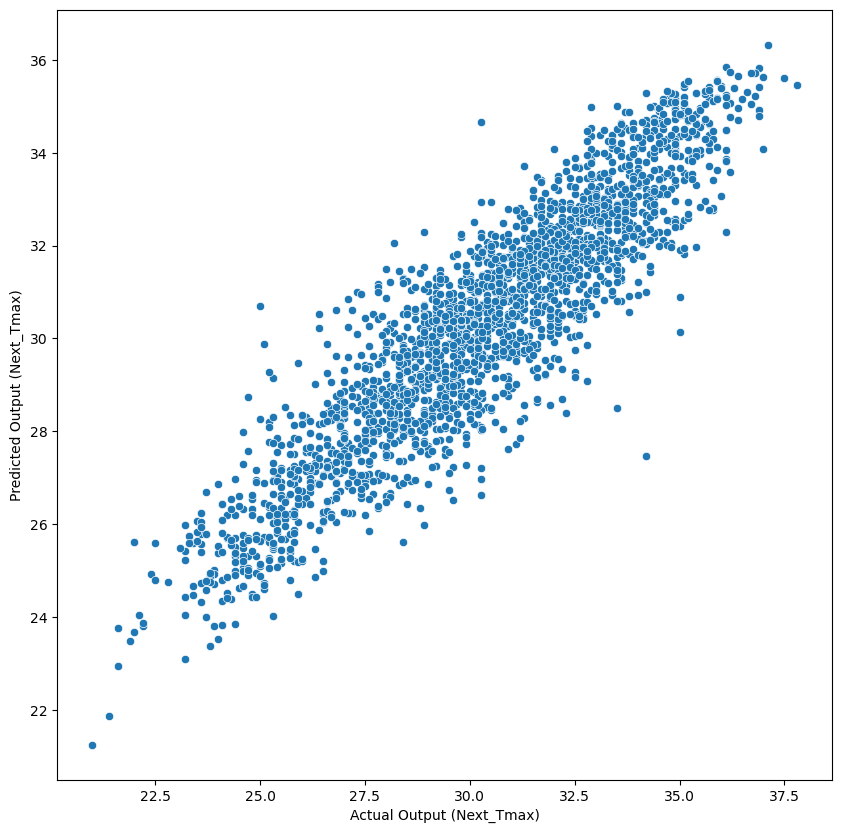

In [191]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=y_predictgr)
plt.xlabel("Actual Output (Next_Tmax)")
plt.ylabel("Predicted Output (Next_Tmax)")
plt.show()

The result from the scatterplot shows that when the actual output increases predicted output also increase and this shows the ExtraTreesRegressor model perform better compared to other regression models.

# Prediction for Next_Tmin

# Display the first 5 records from the dataset using head() method

In [193]:
temperature_forecast.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688     0.272915   
1      2.0          31.9          21.6    52.263397     0.185831   
2      3.0          31.6          23.3    48.690479    -0.773454   
3      4.0          32.0          23.4    58.239788     1.316777   
4      5.0          31.4          21.9    56.174095     0.110968   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         -0.312411  0.093387  0.310382   0.233947  ...   
1         29.850689          0.144368 -0.625565 -0.211695   0.225508  ...   
2         30.091292          0.394571 -0.314874 -1.375126   0.209344  ...   
3         29.704629         -0.174463 -0.656732  0.204179   0.216372  ...   
4         29.113934         -0.103881 -0.593836  1.300503   0.151407  ...   

   LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
0   -0.532418   -0.505596   -0.458389  37.6046  126.991  1.834978  1.314153   
1   -0.532418   -0.505596   -0.458389  37.6046  127.032  0.055979 -0.385336   
2   -0.532418   -0.505596   -0.458389  37.5776  127.058 -0.364575 -0.949164   
3   -0.532418   -0.505596   -0.458389  37.6450  127.022  0.084879  1.235263   
4   -0.532418   -0.505596   -0.458389  37.5507  127.135 -0.290442 -0.401730   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 24 columns]

# Split the data as x(input) and y(label/output)

In [195]:
x=temperature_forecast.drop(columns='Next_Tmin',axis=1)
x.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688     0.272915   
1      2.0          31.9          21.6    52.263397     0.185831   
2      3.0          31.6          23.3    48.690479    -0.773454   
3      4.0          32.0          23.4    58.239788     1.316777   
4      5.0          31.4          21.9    56.174095     0.110968   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         -0.312411  0.093387  0.310382   0.233947  ...   
1         29.850689          0.144368 -0.625565 -0.211695   0.225508  ...   
2         30.091292          0.394571 -0.314874 -1.375126   0.209344  ...   
3         29.704629         -0.174463 -0.656732  0.204179   0.216372  ...   
4         29.113934         -0.103881 -0.593836  1.300503   0.151407  ...   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0   -0.570471   -0.532418   -0.505596   -0.458389  37.6046  126.991  1.834978   
1   -0.570471   -0.532418   -0.505596   -0.458389  37.6046  127.032  0.055979   
2   -0.570471   -0.532418   -0.505596   -0.458389  37.5776  127.058 -0.364575   
3   -0.570471   -0.532418   -0.505596   -0.458389  37.6450  127.022  0.084879   
4   -0.570471   -0.532418   -0.505596   -0.458389  37.5507  127.135 -0.290442   

      Slope  Solar radiation  Next_Tmax  
0  1.314153      5992.895996       29.1  
1 -0.385336      5869.312500       30.5  
2 -0.949164      5863.555664       31.1  
3  1.235263      5856.964844       31.7  
4 -0.401730      5859.552246       31.2  

[5 rows x 23 columns]

In [197]:
y=temperature_forecast['Next_Tmin']
y.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

# Check for multicollinearity in the dataset using variance inflation factor

In [199]:
def calc_vif(x):
    df=pd.DataFrame()
    df['columns']=x.columns
    df['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return df

In [201]:
calc_vif(x)

columns            vif
0            station       5.466265
1       Present_Tmax     301.085981
2       Present_Tmin     302.826074
3        LDAPS_RHmin     106.195375
4        LDAPS_RHmax       2.594988
5   LDAPS_Tmax_lapse     878.615413
6   LDAPS_Tmin_lapse       6.403391
7           LDAPS_WS       1.277957
8           LDAPS_LH       1.519750
9          LDAPS_CC1      15.057891
10         LDAPS_CC2      17.559205
11         LDAPS_CC3       4.991706
12         LDAPS_CC4       3.079338
13        LDAPS_PPT1       2.585252
14        LDAPS_PPT2       2.356485
15        LDAPS_PPT3       1.818239
16        LDAPS_PPT4       1.822560
17               lat  697988.113735
18               lon  696698.092058
19               DEM       3.221373
20             Slope       2.861352
21   Solar radiation     203.178988
22         Next_Tmax     395.599984

In [203]:
x=x.drop(columns=['lat','lon'],axis=1)

In [205]:
calc_vif(x)

columns         vif
0            station    5.193564
1       Present_Tmax  263.760509
2       Present_Tmin  279.043308
3        LDAPS_RHmin   68.579355
4        LDAPS_RHmax    2.471242
5   LDAPS_Tmax_lapse  503.117538
6   LDAPS_Tmin_lapse    1.578986
7           LDAPS_WS    1.270319
8           LDAPS_LH    1.457918
9          LDAPS_CC1   14.485428
10         LDAPS_CC2   17.404139
11         LDAPS_CC3    4.964712
12         LDAPS_CC4    3.078945
13        LDAPS_PPT1    2.493542
14        LDAPS_PPT2    2.330468
15        LDAPS_PPT3    1.816599
16        LDAPS_PPT4    1.816832
17               DEM    3.009191
18             Slope    2.756251
19   Solar radiation  200.566317
20         Next_Tmax  394.527223

In [207]:
x=x.drop(columns='LDAPS_Tmax_lapse',axis=1)

In [209]:
calc_vif(x)

columns         vif
0            station    5.168993
1       Present_Tmax  257.970695
2       Present_Tmin  260.057202
3        LDAPS_RHmin   61.600396
4        LDAPS_RHmax    2.469771
5   LDAPS_Tmin_lapse    1.518249
6           LDAPS_WS    1.264714
7           LDAPS_LH    1.416906
8          LDAPS_CC1   14.362418
9          LDAPS_CC2   17.350801
10         LDAPS_CC3    4.891694
11         LDAPS_CC4    3.059611
12        LDAPS_PPT1    2.487881
13        LDAPS_PPT2    2.313321
14        LDAPS_PPT3    1.808669
15        LDAPS_PPT4    1.814953
16               DEM    2.995597
17             Slope    2.753835
18   Solar radiation  160.407065
19         Next_Tmax  252.711931

In [211]:
x=x.drop(columns='Next_Tmax',axis=1)

In [213]:
x.duplicated().sum()

0

# Apply standardscaler technique to scale the x input data

In [215]:
sc=StandardScaler()
x_scalesmin=sc.fit_transform(x)
x_scaledmin=pd.DataFrame(x_scalesmin,columns=x.columns)
x_scaledmin.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.665731     -0.384401     -0.818439     0.105282     0.273861   
1 -1.527077      0.717114     -0.731865    -0.308630     0.186516   
2 -1.388424      0.613847      0.004013    -0.555426    -0.775651   
3 -1.249770      0.751536      0.047300     0.104183     1.320859   
4 -1.111116      0.545002     -0.602004    -0.038502     0.111428   

   LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0         -0.344495  0.099140  0.318609  -0.514100  -0.591307  -0.538928   
1          0.125132 -0.634253 -0.210114  -0.546490  -0.403748  -0.551427   
2          0.382374 -0.317322 -1.388353  -0.608530  -0.381426  -0.313454   
3         -0.202667 -0.666046  0.211054  -0.581555  -0.504702  -0.541916   
4         -0.130099 -0.601887  1.321333  -0.830892  -0.410707  -0.445285   

   LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM  \
0  -0.582501   -0.568321   -0.530683   -0.500777   -0.453755  1.848115   
1  -0.601368   -0.568321   -0.530683   -0.500777   -0.453755  0.064232   
2  -0.517553   -0.568321   -0.530683   -0.500777   -0.453755 -0.357477   
3  -0.563071   -0.568321   -0.530683   -0.500777   -0.453755  0.093211   
4  -0.362558   -0.568321   -0.530683   -0.500777   -0.453755 -0.283140   

      Slope  Solar radiation  
0  1.321582         1.522342  
1 -0.379641         1.230691  
2 -0.944045         1.217105  
3  1.242611         1.201551  
4 -0.396052         1.207657

# Instantiate the regression models

In [219]:
lrn=LinearRegression()
knns=KNeighborsRegressor()
lso=Lasso(alpha=0.00001)
rge=Ridge(alpha=0.00001)
eln=ElasticNet(alpha=0.00001)
svrs=SVR()
lsvrs=LinearSVR()
dtrs=DecisionTreeRegressor()
rfrs=RandomForestRegressor()
adab=AdaBoostRegressor()
grs=GradientBoostingRegressor()
bags=BaggingRegressor()
etrs=ExtraTreesRegressor()

model_names=[(lrn,"Linear Regression"),
             (knns,"Knearest Neighbor Regressor"),
             (lso,"Lasso"),
             (rge,"Ridge"),
             (eln,"ElasticNet"),
             (svrs,"Support Vector regressor"),
             (lsvrs,"LinearSVR"),
             (dtrs,"DecisionTreeRegressor"),
             (rfrs,"RandomForestRegressor"),
             (adab,"AdaBoostRegressor"),
             (grs,"GradientBoostingRegressor"),
             (bags,"BaggingRegressor"),
             (etrs,"ExtraTreesRegressor")]

# Perform cross validation for each model to check for the best performing model

In [221]:
models=[lrn,knns,lso,rge,eln,svrs,lsvrs,dtrs,rfrs,adab,grs,bags,etrs]

for i in models:
    cvs=cross_val_score(i,x_scaledmin,y,cv=5,n_jobs=-1)
    print("Cross validation score for",i,"is",cvs,"\n Mean of the cross validation is",np.mean(cvs),"\n")

Cross validation score for LinearRegression() is [0.67630233 0.62278224 0.78190521 0.81898404 0.84137227] 
 Mean of the cross validation is 0.7482692185505024 

Cross validation score for KNeighborsRegressor() is [0.4492988  0.41164447 0.63655827 0.65320449 0.73320364] 
 Mean of the cross validation is 0.5767819333044988 

Cross validation score for Lasso(alpha=1e-05) is [0.67631498 0.62279408 0.78190557 0.81898621 0.84137272] 
 Mean of the cross validation is 0.7482747135267551 

Cross validation score for Ridge(alpha=1e-05) is [0.67630233 0.62278224 0.78190521 0.81898404 0.84137227] 
 Mean of the cross validation is 0.7482692186719367 

Cross validation score for ElasticNet(alpha=1e-05) is [0.67631004 0.62278824 0.78190488 0.81898558 0.84137294] 
 Mean of the cross validation is 0.7482723354687402 

Cross validation score for SVR() is [0.61058454 0.57999894 0.75830824 0.79018604 0.80221466] 
 Mean of the cross validation is 0.708258485891142 

Cross validation score for LinearSVR() i

# Check for the best random state and maximum accuracy for the best performing model in cross_val_score

In [ ]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaledmin,y,test_size=0.30,random_state=i)
    grs.fit(x_train,y_train)
    y_pred=grs.predict(x_test)
    acc=r2_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Accurancy score is",maxacc,"and random state is",maxrs)

In [227]:
x_train,x_test,y_train,y_test=train_test_split(x_scaledmin,y,test_size=0.30,random_state=30)

In [229]:
x_train.shape

(5349, 19)

In [231]:
x_test.shape

(2293, 19)

In [233]:
y_train.shape

(5349,)

In [235]:
y_test.shape

(2293,)

# Build and train different regression models

In [237]:
model_metric=[]
for model,model_name in model_names:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    r2_train=r2_score(y_train,y_pred_train)
    r2=r2_score(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    models={"Model Name":model_name,"R-Score(Training Data)":r2_train,"R-Score(Test Data)":r2,"Mean Squared Error":mse,"Mean Absolute Error":mae,"Root Mean Squared Error":rmse}
    model_metric.append(models)
df=pd.DataFrame(model_metric)
df=df.sort_values(by="R-Score(Test Data)", ascending=False)
df

Model Name  R-Score(Training Data)  R-Score(Test Data)  \
12          ExtraTreesRegressor                1.000000            0.906422   
8         RandomForestRegressor                0.984768            0.898172   
5      Support Vector regressor                0.909280            0.888402   
11             BaggingRegressor                0.978317            0.884101   
10    GradientBoostingRegressor                0.894459            0.878294   
1   Knearest Neighbor Regressor                0.907829            0.864233   
4                    ElasticNet                0.806250            0.816059   
2                         Lasso                0.806250            0.816059   
3                         Ridge                0.806250            0.816058   
0             Linear Regression                0.806250            0.816058   
6                     LinearSVR                0.804512            0.813915   
9             AdaBoostRegressor                0.790466            0.793034   
7         DecisionTreeRegressor                1.000000            0.758007   

    Mean Squared Error  Mean Absolute Error  Root Mean Squared Error  
12            0.526360             0.550865                 0.725507  
8             0.572764             0.577921                 0.756812  
5             0.627719             0.610099                 0.792287  
11            0.651907             0.617360                 0.807408  
10            0.684571             0.635412                 0.827388  
1             0.763662             0.666610                 0.873878  
4             1.034632             0.789174                 1.017169  
2             1.034632             0.789174                 1.017169  
3             1.034637             0.789175                 1.017171  
0             1.034637             0.789175                 1.017171  
6             1.046691             0.790988                 1.023079  
9             1.164143             0.872735                 1.078955  
7             1.361162             0.863441                 1.166689

In [239]:
grs.fit(x_train,y_train)
y_pred_trains=grs.predict(x_train)
y_predgrs=grs.predict(x_test)
print("Training data Score",r2_score(y_train,y_pred_trains))
print("R-Score for test data",r2_score(y_test,y_predgrs))
print("Mean Squared Error",mean_squared_error(y_test,y_predgrs))
print("Mean Absolute Error",mean_absolute_error(y_test,y_predgrs))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_predgrs)))

Training data Score 0.8944588735120629
R-Score for test data 0.8783018242692713
Mean Squared Error 0.6845289503249994
Mean Absolute Error 0.635254006272213
Root Mean Squared Error 0.8273626474074107


# Hyperparameter tuning for gradient boosting regressor

In [241]:
grid_params={'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion' : ['friedman_mse', 'squared_error'],'max_features':['sqrt','log2'],'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.000001]}

In [243]:
gscv2=GridSearchCV(grs,grid_params,cv=5,n_jobs=-1,return_train_score=True)

In [245]:
gscv2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['sqrt', 'log2']},
             return_train_score=True)

In [247]:
gscv2.best_params_

{'alpha': 0.01,
 'criterion': 'squared_error',
 'loss': 'squared_error',
 'max_features': 'sqrt'}

In [249]:
grb=GradientBoostingRegressor(criterion='squared_error',max_features='sqrt',loss='squared_error',alpha=0.01)
grb.fit(x_train,y_train)
y_predictsgr=grb.predict(x_test)
y_predictsgr

array([23.16192433, 23.41430314, 24.36891625, ..., 19.59343192,
       21.29527092, 22.93678692])

In [253]:
y_pred_trains=grb.predict(x_train)
print("Training data Score",r2_score(y_train,y_pred_trains))
print("R-Score for test data",r2_score(y_test,y_predictsgr))
print("Mean Squared Error",mean_squared_error(y_test,y_predictsgr))
print("Mean Absolute Error",mean_absolute_error(y_test,y_predictsgr))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_predictsgr)))

Training data Score 0.8843191423037919
R-Score for test data 0.870433404180011
Mean Squared Error 0.728787307626385
Mean Absolute Error 0.6562244004029976
Root Mean Squared Error 0.8536904050218586


# Save the best model

In [255]:
import pickle

filename='TemperatureForecastmin.pkl'
pickle.dump(grs,open(filename,'wb'))

# Load the model

In [261]:
import pickle

model=pickle.load(open('TemperatureForecastmin.pkl','rb'))
y_predrg=model.predict(x_test)

In [263]:
b=np.array(y_test)
df1=pd.DataFrame()
df1["Actual Output"]=b
df1["Predicted Output"]=np.round(y_predrg,2)
df1

Actual Output  Predicted Output
0              22.8             23.04
1              23.5             23.75
2              25.0             24.21
3              18.6             18.46
4              18.3             18.43
...             ...               ...
2288           23.9             23.64
2289           25.0             24.47
2290           19.2             19.13
2291           20.3             21.70
2292           23.4             22.98

[2293 rows x 2 columns]

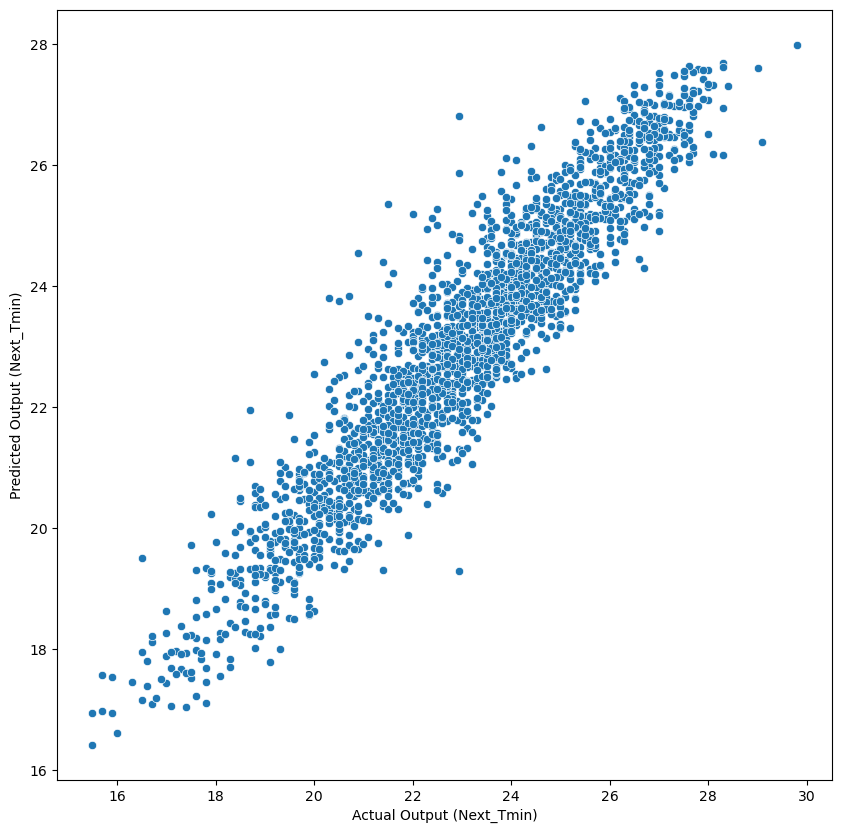

In [265]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=b,y=y_predrg)
plt.xlabel("Actual Output (Next_Tmin)")
plt.ylabel("Predicted Output (Next_Tmin)")
plt.show()

The result from the scatterplot shows that when the actual output increases predicted output also increase and this shows the Gradient boosting regressor model performs better compared to other regression models.